_______________________________________________________
_______________________________________________________

- Cleaning the Phase 8 throughfully
- 1 leak for all the data
- we dont have enough failure information

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
msn10 = pd.read_csv("/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_10_fuel_leak_signals_preprocessed.csv", delimiter=';')


In [38]:
msn10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621610 entries, 0 to 621609
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UTC_TIME            621610 non-null  object 
 1   FUEL_USED_2         59338 non-null   float64
 2   FUEL_USED_3         60936 non-null   float64
 3   FUEL_USED_4         55775 non-null   float64
 4   FW_GEO_ALTITUDE     538673 non-null  float64
 5   VALUE_FOB           538673 non-null  float64
 6   VALUE_FUEL_QTY_CT   538673 non-null  float64
 7   VALUE_FUEL_QTY_FT1  538673 non-null  float64
 8   VALUE_FUEL_QTY_FT2  538673 non-null  float64
 9   VALUE_FUEL_QTY_FT3  538673 non-null  float64
 10  VALUE_FUEL_QTY_FT4  538673 non-null  float64
 11  VALUE_FUEL_QTY_LXT  538673 non-null  float64
 12  VALUE_FUEL_QTY_RXT  538673 non-null  float64
 13  FLIGHT_PHASE_COUNT  539246 non-null  float64
 14  FUEL_USED_1         52439 non-null   float64
 15  Flight              621610 non-nul

In [39]:
len(msn10["Flight"].unique())

540

In [40]:
# 1) Check if there are Flights not covering all flight phases
flight_phases_per_flight = msn10.groupby('Flight')['FLIGHT_PHASE_COUNT'].nunique()
max_phases = flight_phases_per_flight.max()
flights_full_phase_coverage = flight_phases_per_flight[flight_phases_per_flight == max_phases]

# 2) Count how many counts we have for each FLIGHT_PHASE_COUNT
phase_counts = msn10['FLIGHT_PHASE_COUNT'].value_counts()
phase_counts

8.0     425238
2.0      61455
11.0     36883
9.0       7366
7.0       4517
6.0       1117
10.0       902
3.0        628
5.0        446
1.0        427
4.0        233
12.0        32
0.0          2
Name: FLIGHT_PHASE_COUNT, dtype: int64

In [41]:
# those flights cover all flight phases
flights_full_phase_coverage

Flight
11.0     12
42.0     12
51.0     12
53.0     12
62.0     12
92.0     12
109.0    12
122.0    12
127.0    12
132.0    12
136.0    12
139.0    12
180.0    12
181.0    12
184.0    12
196.0    12
232.0    12
248.0    12
254.0    12
266.0    12
292.0    12
295.0    12
298.0    12
329.0    12
454.0    12
536.0    12
Name: FLIGHT_PHASE_COUNT, dtype: int64

In [42]:
# Convert 'UTC_TIME' to datetime
msn10['UTC_TIME'] = pd.to_datetime(msn10['UTC_TIME'])

# Create new columns for date and time
msn10['DATE'] = msn10['UTC_TIME'].dt.date
msn10['TIME'] = msn10['UTC_TIME'].dt.time



In [8]:
msn10.dtypes

UTC_TIME              datetime64[ns]
FUEL_USED_2                  float64
FUEL_USED_3                  float64
FUEL_USED_4                  float64
FW_GEO_ALTITUDE              float64
VALUE_FOB                    float64
VALUE_FUEL_QTY_CT            float64
VALUE_FUEL_QTY_FT1           float64
VALUE_FUEL_QTY_FT2           float64
VALUE_FUEL_QTY_FT3           float64
VALUE_FUEL_QTY_FT4           float64
VALUE_FUEL_QTY_LXT           float64
VALUE_FUEL_QTY_RXT           float64
FLIGHT_PHASE_COUNT           float64
FUEL_USED_1                  float64
Flight                       float64
MSN                           object
DATE                          object
TIME                          object
dtype: object

In [43]:
# Check if there are any duplicates in the UTC_TIME column
has_duplicates = msn10.duplicated(['UTC_TIME']).any()

# Print the result
print("Are there any duplicates in the UTC_TIME column?", has_duplicates)#


Are there any duplicates in the UTC_TIME column? False


In [44]:
msn10=msn10[msn10["FLIGHT_PHASE_COUNT"]==8]

In [45]:
list(msn10["Flight"].unique())

[11.0,
 42.0,
 51.0,
 53.0,
 60.0,
 62.0,
 82.0,
 92.0,
 109.0,
 111.0,
 122.0,
 123.0,
 127.0,
 132.0,
 136.0,
 139.0,
 143.0,
 173.0,
 180.0,
 181.0,
 184.0,
 196.0,
 232.0,
 235.0,
 239.0,
 248.0,
 254.0,
 266.0,
 292.0,
 295.0,
 298.0,
 329.0,
 401.0,
 402.0,
 454.0,
 487.0,
 492.0,
 536.0,
 539.0]

# 1 Sum FUEL_USED_TOTAL  + Sum FUEL_QTY_TOTAL

In [46]:
#Sum of the fuel used
msn10["FUEL_USED_TOTAL"]= msn10["FUEL_USED_1"] + msn10["FUEL_USED_2"]+msn10["FUEL_USED_3"]+msn10["FUEL_USED_4"]

In [47]:
FUEL_USED_TOTAL_PER_FLIGHT = msn10.groupby('Flight')['FUEL_USED_TOTAL'].sum().reset_index(name='FUEL_USED_TOTAL_PER_FLIGHT')


In [48]:

msn10["FUEL_QTY_TOTAL"] =msn10[ "VALUE_FUEL_QTY_CT"] + msn10["VALUE_FUEL_QTY_FT1"]+ msn10["VALUE_FUEL_QTY_FT2"]+ msn10["VALUE_FUEL_QTY_FT3"]+ msn10["VALUE_FUEL_QTY_FT4"]+ msn10["VALUE_FUEL_QTY_LXT"] + msn10["VALUE_FUEL_QTY_RXT"]

In [49]:
# Step 1: Calculate the change in FOB for each second within each flight
msn10['FOB_change'] = msn10.groupby('Flight')['VALUE_FOB'].diff().abs()
msn10["ALTITUDE_change"]=msn10.groupby("Flight")["FW_GEO_ALTITUDE"].diff().abs()

# It's common to have the first row of each group with a NaN value in the diff column (since there's no previous row to compare within the group),
# so you can fill these NaN values with zeros if appropriate
msn10['FOB_change'] = msn10['FOB_change'].fillna(0)
msn10['ALTITUDE_change'] = msn10['ALTITUDE_change'].fillna(0)

In [50]:
# Assuming UTC_TIME is in a format that allows calculation of time differences (e.g., datetime object)
# Calculate the time difference in seconds within each flight group
msn10['Time_diff_seconds'] = msn10.groupby('Flight')['UTC_TIME'].diff().dt.total_seconds().fillna(0)

# Calculate FOB change rate as FOB_change per second
msn10['FOB_change_rate'] = msn10['FOB_change'] / msn10['Time_diff_seconds']
msn10['FOB_change_rate'] = msn10['FOB_change_rate'].fillna(0)  # Handle division by zero or NaNs

# Calculate Altitude change rate as ALTITUDE_change per second
msn10['ALTITUDE_change_rate'] = msn10['ALTITUDE_change'] / msn10['Time_diff_seconds']
msn10['ALTITUDE_change_rate'] = msn10['ALTITUDE_change_rate'].fillna(0)  # Handle division by zero or NaNs

# Handle cases where Time_diff_seconds is 0 to avoid division by zero errors
msn10.loc[msn10['Time_diff_seconds'] == 0, 'FOB_change_rate'] = 0
msn10.loc[msn10['Time_diff_seconds'] == 0, 'ALTITUDE_change_rate'] = 0

In [51]:
# Calculate cumulative sum of FOB changes for each flight
msn10['FOB_change_cumulative'] = msn10.groupby('Flight')['FOB_change'].cumsum()

# 2 Filter for Flights that contain Values not NAN in Fuel_used

In [18]:
filtered_flights = msn10.dropna(subset=['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4'], how='all')

flights_with_Fuel_used=sorted(list(filtered_flights["Flight"].unique()))
flights_with_Fuel_used

[]

# 3 Filter for Flights that contain Values NOT NAN in VALUE_FOB

In [42]:
filtered_flights_2 = msn10.dropna(subset=["VALUE_FOB"], how='all')
flights_with_FOB=sorted(list(filtered_flights_2["Flight"].unique()))
flights_with_FOB

[11.0,
 42.0,
 51.0,
 53.0,
 60.0,
 62.0,
 82.0,
 92.0,
 109.0,
 111.0,
 122.0,
 123.0,
 127.0,
 132.0,
 136.0,
 139.0,
 143.0,
 149.0,
 154.0,
 173.0,
 180.0,
 181.0,
 184.0,
 187.0,
 188.0,
 189.0,
 191.0,
 192.0,
 196.0,
 232.0,
 235.0,
 239.0,
 248.0,
 254.0,
 266.0,
 272.0,
 279.0,
 292.0,
 295.0,
 298.0,
 307.0,
 308.0,
 309.0,
 318.0,
 329.0,
 364.0,
 367.0,
 372.0,
 373.0,
 374.0,
 375.0,
 381.0,
 387.0,
 401.0,
 402.0,
 408.0,
 410.0,
 431.0,
 440.0,
 441.0,
 446.0,
 454.0,
 471.0,
 484.0,
 487.0,
 492.0,
 496.0,
 514.0,
 536.0,
 539.0]

# 4 Find Flights which have both FOB and NO NAN in Fuel_used

In [43]:
set(flights_with_Fuel_used) & set(flights_with_FOB)

{62.0,
 111.0,
 122.0,
 127.0,
 132.0,
 154.0,
 173.0,
 181.0,
 187.0,
 188.0,
 189.0,
 235.0,
 248.0,
 272.0,
 308.0,
 318.0,
 372.0,
 375.0,
 408.0,
 410.0,
 440.0,
 441.0,
 471.0,
 484.0,
 487.0,
 496.0,
 536.0}

In [44]:
len(set(flights_with_Fuel_used) & set(flights_with_FOB))

27

In [45]:
relevant_flights=set(flights_with_Fuel_used) & set(flights_with_FOB)

# 5 Filter for Flights that have values in Flight Phase 8

In [46]:
phase_8= msn10[ msn10["FLIGHT_PHASE_COUNT"]==8]

In [48]:
phase_8.shape

(425238, 20)

In [52]:
len(phase_8["Flight"].unique())

39

In [53]:
flights_with_phase_8=list(phase_8["Flight"].unique())

In [54]:
relevant_flights=set(relevant_flights) & set(flights_with_phase_8)

In [56]:
relevant_flights

{62.0, 111.0, 122.0, 127.0, 132.0, 173.0, 181.0, 235.0, 248.0, 487.0, 536.0}

In [57]:
len(relevant_flights)

11

In [70]:
filtered_msn10 = msn10[msn10['Flight'].isin(relevant_flights)]

In [71]:
filtered_msn10.shape

(155174, 23)

In [72]:
filtered_msn10.head(10)

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,DATE,TIME,FUEL_QTY_TOTAL,FUEL_USED_TOTAL,FOB_change,ALTITUDE_change
44264,2014-08-16 00:30:53,NaN,NaN,NaN,140.0,19632.0,0.0,1996.0,2559.0,2565.0,1906.0,5623.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:53,19634.0,NaN,0.0,0.0
44265,2014-08-16 00:30:54,NaN,NaN,NaN,140.0,19635.0,0.0,1997.0,2560.0,2565.0,1906.0,5624.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:54,19637.0,NaN,3.0,0.0
44266,2014-08-16 00:30:55,NaN,NaN,NaN,141.0,19634.0,0.0,1998.0,2559.0,2565.0,1906.0,5623.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:55,19636.0,NaN,1.0,1.0
44267,2014-08-16 00:30:56,NaN,NaN,NaN,143.0,19635.0,0.0,1999.0,2559.0,2565.0,1906.0,5624.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:56,19638.0,NaN,1.0,2.0
44268,2014-08-16 00:30:57,NaN,NaN,NaN,141.0,19637.0,0.0,2000.0,2559.0,2565.0,1906.0,5624.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:57,19639.0,NaN,2.0,2.0
44269,2014-08-16 00:30:58,NaN,NaN,NaN,141.0,19636.0,0.0,1999.0,2559.0,2564.0,1906.0,5625.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:58,19638.0,NaN,1.0,0.0
44270,2014-08-16 00:30:59,NaN,NaN,NaN,141.0,19632.0,0.0,1997.0,2560.0,2564.0,1906.0,5624.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:30:59,19636.0,NaN,4.0,0.0
44271,2014-08-16 00:31:00,NaN,NaN,NaN,141.0,19633.0,0.0,1996.0,2560.0,2563.0,1906.0,5625.0,4985.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:31:00,19635.0,NaN,1.0,0.0
44272,2014-08-16 00:31:01,NaN,NaN,NaN,141.0,19629.0,0.0,1995.0,2560.0,2562.0,1906.0,5625.0,4984.0,1.0,NaN,62.0,F-RBAC,2014-08-16,00:31:01,19632.0,NaN,4.0,0.0
44273,2014-08-16 00:31:02,NaN,NaN,NaN,142.0,19628.0,0.0,1994.0,2560.0,2560.0,1906.0,5625.0,4985.0,2.0,NaN,62.0,F-RBAC,2014-08-16,00:31:02,19630.0,NaN,1.0,1.0


# 6 Check for all the plot  

In [70]:
msn10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425238 entries, 2096 to 621609
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   UTC_TIME               425238 non-null  datetime64[ns]
 1   FUEL_USED_2            0 non-null       float64       
 2   FUEL_USED_3            0 non-null       float64       
 3   FUEL_USED_4            0 non-null       float64       
 4   FW_GEO_ALTITUDE        425238 non-null  float64       
 5   VALUE_FOB              425238 non-null  float64       
 6   VALUE_FUEL_QTY_CT      425238 non-null  float64       
 7   VALUE_FUEL_QTY_FT1     425238 non-null  float64       
 8   VALUE_FUEL_QTY_FT2     425238 non-null  float64       
 9   VALUE_FUEL_QTY_FT3     425238 non-null  float64       
 10  VALUE_FUEL_QTY_FT4     425238 non-null  float64       
 11  VALUE_FUEL_QTY_LXT     425238 non-null  float64       
 12  VALUE_FUEL_QTY_RXT     425238 non-null  f

In [92]:
for element in list(msn10["Flight"].unique()):
  import matplotlib.pyplot as plt
  relation_FOB_FUSED = msn10[msn10["Flight"] == element]# & (msn10["FLIGHT_PHASE_COUNT"] == 8)]
  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['VALUE_FOB'], label='FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_change_cumulative'], label='FOB_change_cumulative')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_QTY_TOTAL'], label='Fuel Quantity Total')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_change_rate'], label='Change in FOB ')
  plt.xlabel('UTC Time')
  plt.ylabel('Value')
  plt.title(f'FOB Value and Fuel Used Total Over Time for Flight {element}')
  plt.legend()
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

# 7 CALC expected burn rate per second from MSN02

In [52]:
msn02 = pd.read_csv("/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv", delimiter=';')

In [53]:
# 1) Check if there are Flights not covering all flight phases
flight_phases_per_flight = msn02.groupby('Flight')['FLIGHT_PHASE_COUNT'].nunique()
max_phases = flight_phases_per_flight.max()
flights_full_phase_coverage = flight_phases_per_flight[flight_phases_per_flight == max_phases]

# 2) Count how many counts we have for each FLIGHT_PHASE_COUNT
phase_counts = msn02['FLIGHT_PHASE_COUNT'].value_counts()
phase_counts

8.0     392705
1.0      59493
2.0      50511
11.0     33583
12.0     10026
9.0       5531
7.0       4448
6.0       1200
3.0       1075
10.0      1059
4.0        554
5.0        473
Name: FLIGHT_PHASE_COUNT, dtype: int64

In [54]:
# Convert 'UTC_TIME' to datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])

# Create new columns for date and time
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time



In [55]:
# Check if there are any duplicates in the UTC_TIME column
has_duplicates = msn02.duplicated(['UTC_TIME']).any()

# Print the result
print("Are there any duplicates in the UTC_TIME column?", has_duplicates)

Are there any duplicates in the UTC_TIME column? True


In [56]:
msn02 = msn02.drop_duplicates(['UTC_TIME'], keep='first')

In [57]:
msn02_original = msn02.copy()

In [58]:
msn02 = msn02_original[msn02_original['FLIGHT_PHASE_COUNT'] == 8]
msn02.reset_index(drop=True, inplace=True)

In [59]:
msn02.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383564 entries, 0 to 383563
Data columns (total 113 columns):
 #    Column                                Dtype         
---   ------                                -----         
 0    UTC_TIME                              datetime64[ns]
 1    MSN                                   object        
 2    Flight                                object        
 3    ENGINE_RUNNING_1                      bool          
 4    ENGINE_RUNNING_2                      bool          
 5    ENGINE_RUNNING_3                      bool          
 6    ENGINE_RUNNING_4                      bool          
 7    FLIGHT_PHASE_COUNT                    float64       
 8    FUEL_FLOW_1                           float64       
 9    FUEL_FLOW_2                           float64       
 10   FUEL_FLOW_3                           float64       
 11   FUEL_FLOW_4                           float64       
 12   FUEL_PITCH                            float64       
 13

In [60]:

# Calculating the sum of fuel used and total fuel quantity for msn02
msn02["FUEL_USED_TOTAL"] = msn02["FUEL_USED_1"] + msn02["FUEL_USED_2"] + msn02["FUEL_USED_3"] + msn02["FUEL_USED_4"]
msn02["FUEL_QTY_TOTAL"] = msn02["VALUE_FUEL_QTY_CT"] + msn02["VALUE_FUEL_QTY_FT1"] + msn02["VALUE_FUEL_QTY_FT2"] + msn02["VALUE_FUEL_QTY_FT3"] + msn02["VALUE_FUEL_QTY_FT4"] + msn02["VALUE_FUEL_QTY_LXT"] + msn02["VALUE_FUEL_QTY_RXT"]

# Calculate the change in FOB for each second within each flight for msn02
msn02['FOB_change'] = msn02.groupby('Flight')['VALUE_FOB'].diff().abs()
msn02["ALTITUDE_change"] = msn02.groupby("Flight")["FW_GEO_ALTITUDE"].diff().abs()
msn02["FUEL_USED_change"]=msn02.groupby("Flight")["FUEL_USED_TOTAL"].diff().abs()

# Filling NaN values with zeros for the first row of each group
msn02['FOB_change'] = msn02['FOB_change'].fillna(0)
msn02['ALTITUDE_change'] = msn02['ALTITUDE_change'].fillna(0)
msn02["FUEL_USED_change"] = msn02["FUEL_USED_change"].fillna(0)
msn02['Time_diff_seconds'] = msn02.groupby('Flight')['UTC_TIME'].diff().dt.total_seconds().fillna(0)

# Calculate FOB change rate as FOB_change per second for msn02
msn02['FOB_change_rate'] = msn02['FOB_change'] / msn02['Time_diff_seconds']
msn02['FOB_change_rate'] = msn02['FOB_change_rate'].fillna(0)

# Calculate Altitude change rate as ALTITUDE_change per second for msn02
msn02['ALTITUDE_change_rate'] = msn02['ALTITUDE_change'] / msn02['Time_diff_seconds']
msn02['ALTITUDE_change_rate'] = msn02['ALTITUDE_change_rate'].fillna(0)

# Handle cases where Time_diff_seconds is 0 to avoid division by zero errors in msn02
msn02.loc[msn02['Time_diff_seconds'] == 0, 'FOB_change_rate'] = 0
msn02.loc[msn02['Time_diff_seconds'] == 0, 'ALTITUDE_change_rate'] = 0


<ipython-input-60-67bbc315cf70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02["FUEL_USED_TOTAL"] = msn02["FUEL_USED_1"] + msn02["FUEL_USED_2"] + msn02["FUEL_USED_3"] + msn02["FUEL_USED_4"]
<ipython-input-60-67bbc315cf70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn02["FUEL_QTY_TOTAL"] = msn02["VALUE_FUEL_QTY_CT"] + msn02["VALUE_FUEL_QTY_FT1"] + msn02["VALUE_FUEL_QTY_FT2"] + msn02["VALUE_FUEL_QTY_FT3"] + msn02["VALUE_FUEL_QTY_FT4"] + msn02["VALUE_FUEL_QTY_LXT"] + msn02["VALUE_FUEL_QTY_RXT"]


In [61]:
for element in list(msn02["Flight"].unique()):
  import matplotlib.pyplot as plt
  relation_FOB_FUSED = msn02[msn02["Flight"] == element]# & (msn10["FLIGHT_PHASE_COUNT"] == 8)]
  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['VALUE_FOB'], label='FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL'], label="ToTal used fuel")
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_change'], label='FOB Change')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_change'], label='Change in Fuel Used')
  plt.xlabel('UTC Time')
  plt.ylabel('Value')
  plt.title(f'FOB Value and Fuel Used Total Over Time for Flight {element}')
  plt.legend()
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [62]:

# Group by Flight, sum the fuel used, and calculate the duration for each flight
msn02_phase_8_summary = msn02.groupby('Flight').agg({
    'FUEL_USED_change': 'sum',
    'UTC_TIME': lambda x: (x.max() - x.min()).total_seconds()
}).reset_index()

# Compute the burn rate per second for each flight
msn02_phase_8_summary['burn_rate_per_second'] = msn02_phase_8_summary['FUEL_USED_change'] / msn02_phase_8_summary['UTC_TIME']

# Now calculate the average burn rate per second across all flights during phase 8
average_burn_rate_per_second = msn02_phase_8_summary['burn_rate_per_second'].mean()
median_burn_rate_per_second = msn02_phase_8_summary ["burn_rate_per_second"].median()

print(f'Average burn rate per second across all flights during phase 8: {average_burn_rate_per_second}')
print()
print(f'Median burn rate per second across all flights during phase 8: {median_burn_rate_per_second}')

Average burn rate per second across all flights during phase 8: 1.2692252881369148

Median burn rate per second across all flights during phase 8: 1.2592394511715632


 V0889: Total Fuel Used / Time in seconds = Fuel Burn Rate per Second

SUM of TOTAL_FUEL_USED_per_second

# 8 COMPARE AVG / MEDIAn Expcted Burn Rate of MSN02 with MSN10

- A **positive** value in the Leakage_avg_burn_rate or Leakage_median_burn_rate would indicate that there is less fuel than expected based on the burn rate, suggesting possible leakage.
- A **negative** value would suggest that there is more fuel than expected, which could be due to overestimation of the expected burn rate or other factors such as fuel being added.-

In [63]:

# It calculates the cumulative expected fuel usage up to each point in time for each flight
msn10['Avg_Expected_Fuel_Used'] = msn10.groupby('Flight')['Time_diff_seconds'].cumsum() * average_burn_rate_per_second
msn10['Median_Expected_Fuel_Used'] = msn10.groupby('Flight')['Time_diff_seconds'].cumsum() * median_burn_rate_per_second



# Calculate the difference between the expected fuel used and the actual cumulative fuel used for each flight
msn10['Leakage_avg_burn_rate'] = msn10['Avg_Expected_Fuel_Used'] - msn10['FOB_change_cumulative']
msn10['Leakage_median_burn_rate'] = msn10['Median_Expected_Fuel_Used'] - msn10['FOB_change_cumulative']


# Calculate the cumulative divergence for the average burn rate
msn10['Cumulative_Leakage_Avg'] = msn10.groupby('Flight')['Leakage_avg_burn_rate'].cumsum()
# Calculate the cumulative divergence for the median burn rate
msn10['Cumulative_Leakage_Median'] = msn10.groupby('Flight')['Leakage_median_burn_rate'].cumsum()



In [64]:
msn10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425238 entries, 2096 to 621609
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   UTC_TIME                   425238 non-null  datetime64[ns]
 1   FUEL_USED_2                0 non-null       float64       
 2   FUEL_USED_3                0 non-null       float64       
 3   FUEL_USED_4                0 non-null       float64       
 4   FW_GEO_ALTITUDE            425238 non-null  float64       
 5   VALUE_FOB                  425238 non-null  float64       
 6   VALUE_FUEL_QTY_CT          425238 non-null  float64       
 7   VALUE_FUEL_QTY_FT1         425238 non-null  float64       
 8   VALUE_FUEL_QTY_FT2         425238 non-null  float64       
 9   VALUE_FUEL_QTY_FT3         425238 non-null  float64       
 10  VALUE_FUEL_QTY_FT4         425238 non-null  float64       
 11  VALUE_FUEL_QTY_LXT         425238 non-null  float

# 9 INSPECT leakage for flights in MSN10, Flight Phase 8

In [65]:
print(msn10[['Leakage_avg_burn_rate', 'Leakage_median_burn_rate']].describe())


       Leakage_avg_burn_rate  Leakage_median_burn_rate
count          425238.000000             425238.000000
mean           -16678.680678             -16778.193743
std             30653.899333              30686.095542
min           -128044.981511            -128342.769155
25%             -9545.351762              -9695.634106
50%             -5169.561087              -5278.766450
75%             -2427.877265              -2473.877988
max                 2.807676                  2.777718


In [66]:
# Loop through each flight and plot the cumulative leakage
for element in list(msn10["Flight"].unique()):
    # Filter the dataframe for the selected flight
    flight_data = msn10[msn10['Flight'] == element]

    # Plot cumulative leakage over time for the selected flight
    plt.figure(figsize=(14, 7))

    # Plot for average burn rate based leakage
    plt.plot(flight_data['UTC_TIME'], flight_data['Cumulative_Leakage_Avg'], label='Cumulative Leakage (Avg Burn Rate)', marker='o')

    # Plot for median burn rate based leakage
    plt.plot(flight_data['UTC_TIME'], flight_data['Cumulative_Leakage_Median'], label='Cumulative Leakage (Median Burn Rate)', marker='x')

    plt.xlabel('UTC Time')
    plt.ylabel('Cumulative Leakage')
    plt.title(f'Cumulative Leakage Over Time for Flight {element}')
    plt.legend()
    plt.grid(True)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [67]:
for element in list(msn10["Flight"].unique()):


  # Filter the dataframe for the selected flight
  flight_data = msn10[msn10['Flight'] == element]

  # Plot leakage over time for the selected flight
  plt.figure(figsize=(14, 7))
  plt.plot(flight_data['UTC_TIME'], flight_data['Avg_Expected_Fuel_Used'], label='Avg Expected Fuel Used')
  plt.plot(flight_data['UTC_TIME'], flight_data['Median_Expected_Fuel_Used'], label='Median Expected Fuel Used', alpha=0.7)
  plt.plot(flight_data['UTC_TIME'], flight_data['FOB_change_cumulative'], label='Fuel Used based on FOB Change', alpha=0.7)
  plt.xlabel('UTC Time')
  plt.ylabel('Fuel in L')
  plt.title(f'Real Fuel Use vs Expected Fuel Use for Flight {element}')
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [68]:
for element in list(msn10["Flight"].unique()):


  # Filter the dataframe for the selected flight
  flight_data = msn10[msn10['Flight'] == element]

  # Plot leakage over time for the selected flight
  plt.figure(figsize=(14, 7))
  plt.plot(flight_data['UTC_TIME'], flight_data['Leakage_avg_burn_rate'], label='Leakage (Avg Burn Rate)')
  plt.plot(flight_data['UTC_TIME'], flight_data['Leakage_median_burn_rate'], label='Leakage (Median Burn Rate)', alpha=0.7)
  #plt.plot(flight_data['UTC_TIME'], flight_data['FOB_change_cumulative'], label='Fuel used based on FOB_Change_cumulative', alpha=0.7)
  plt.xlabel('UTC Time')
  plt.ylabel('Leakage')
  plt.title(f'Leakage Over Time for Flight {element}')
  plt.legend()
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

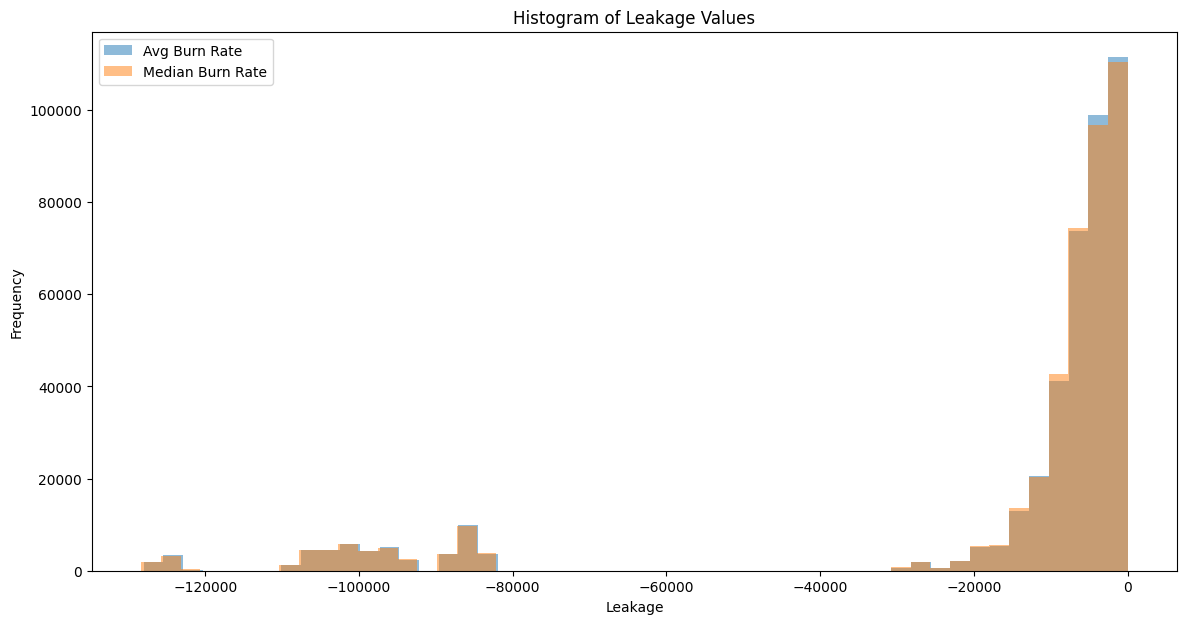

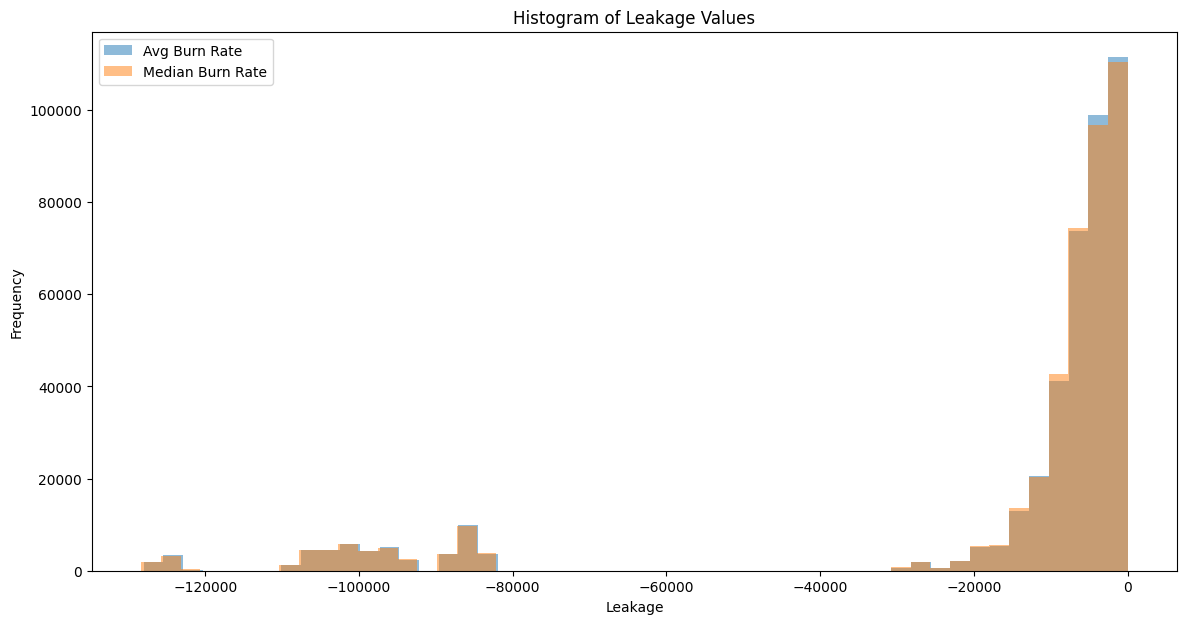

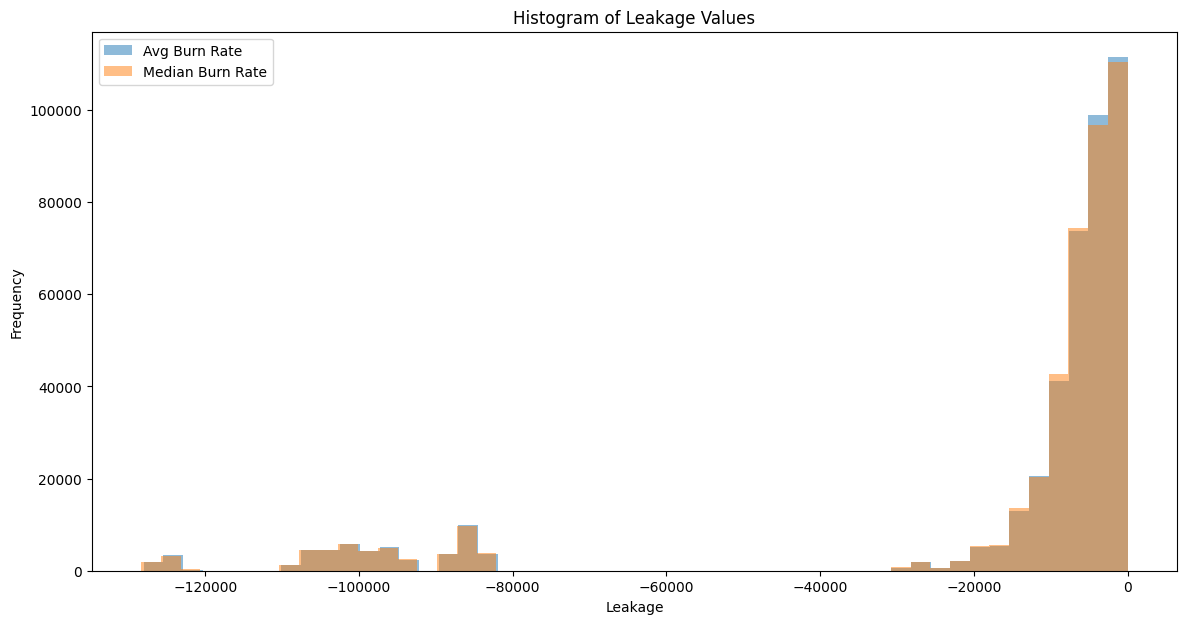

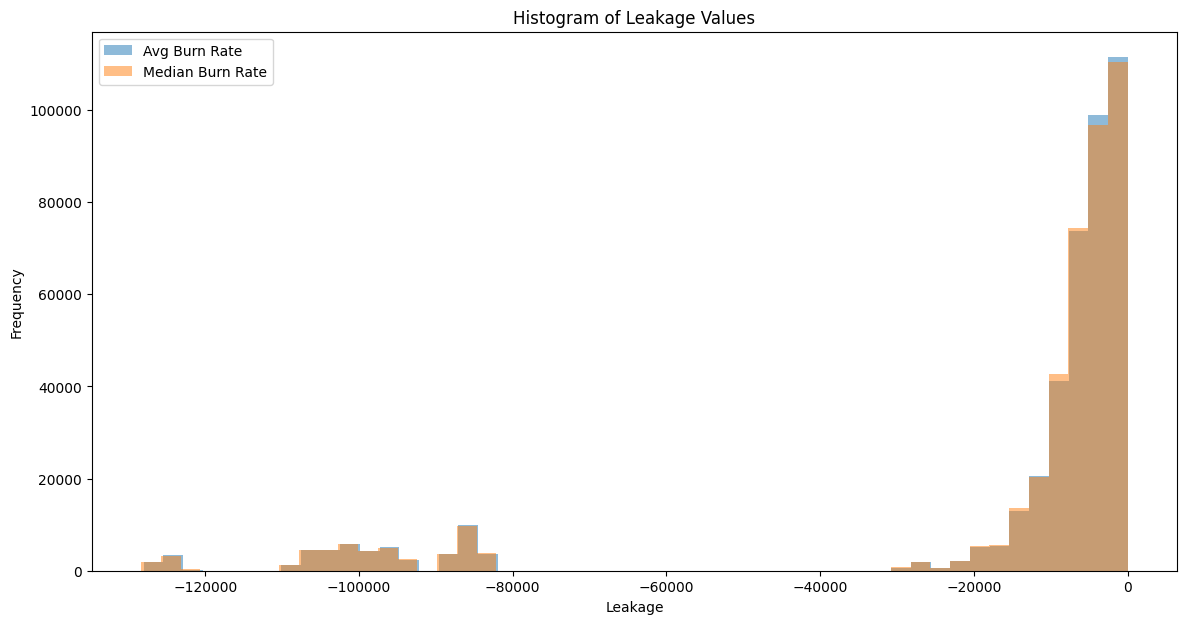

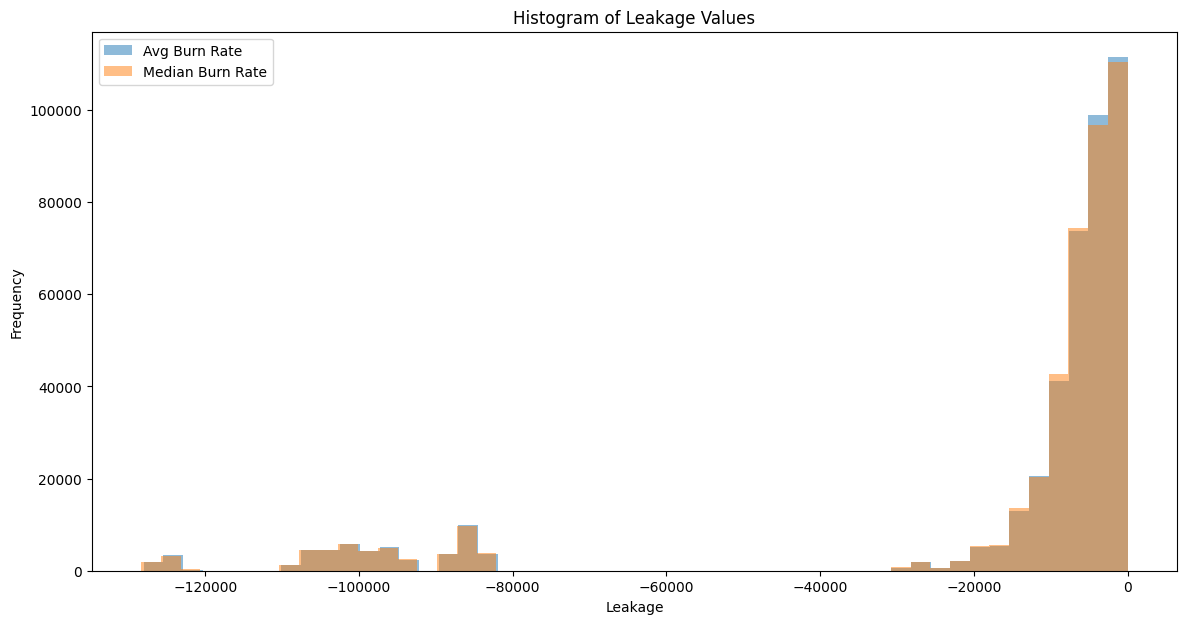

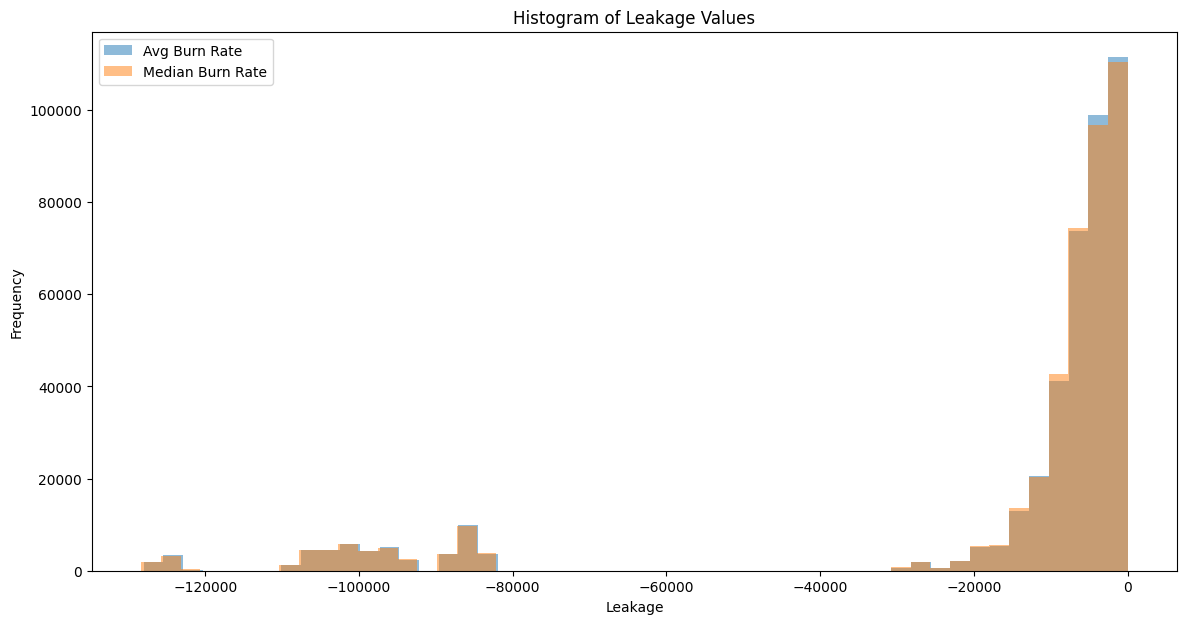

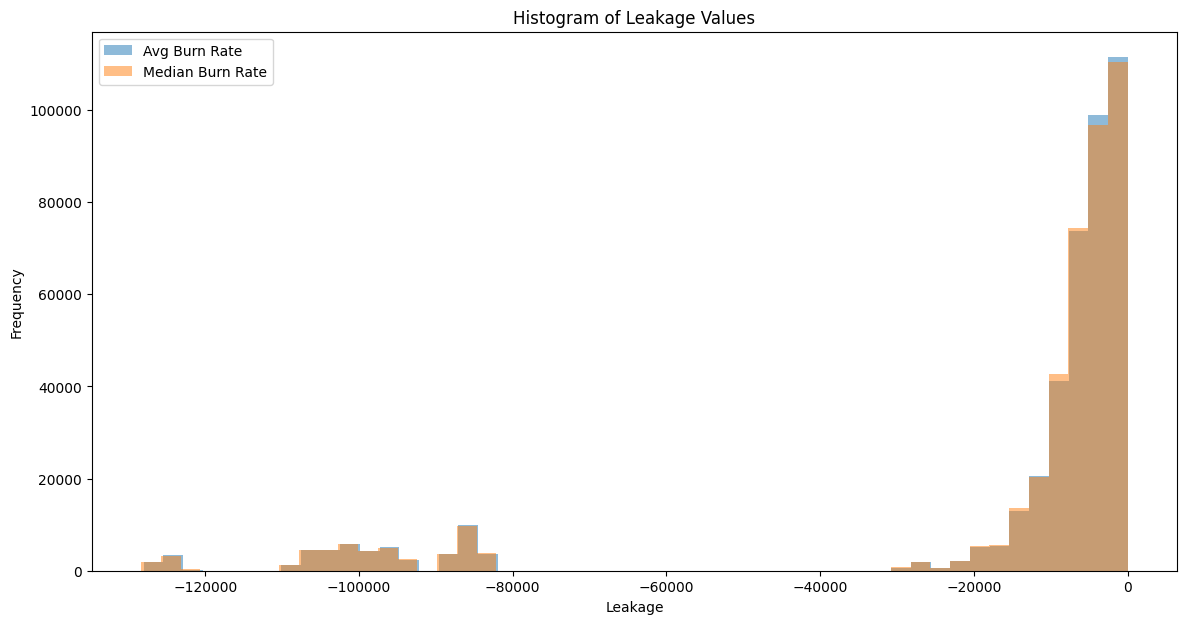

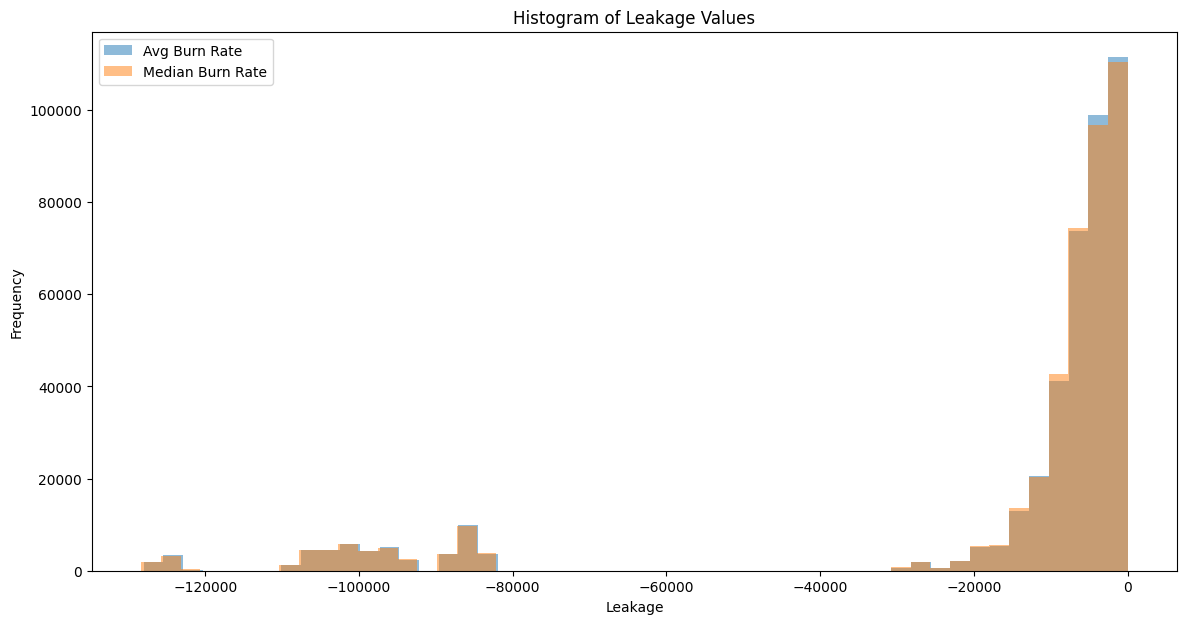

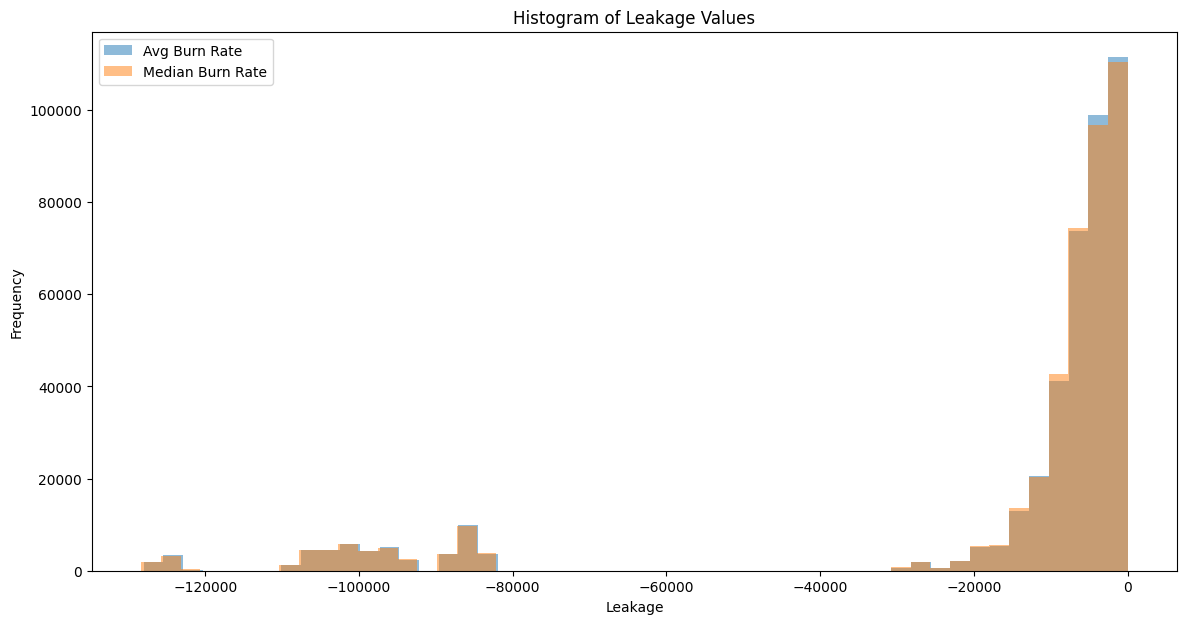

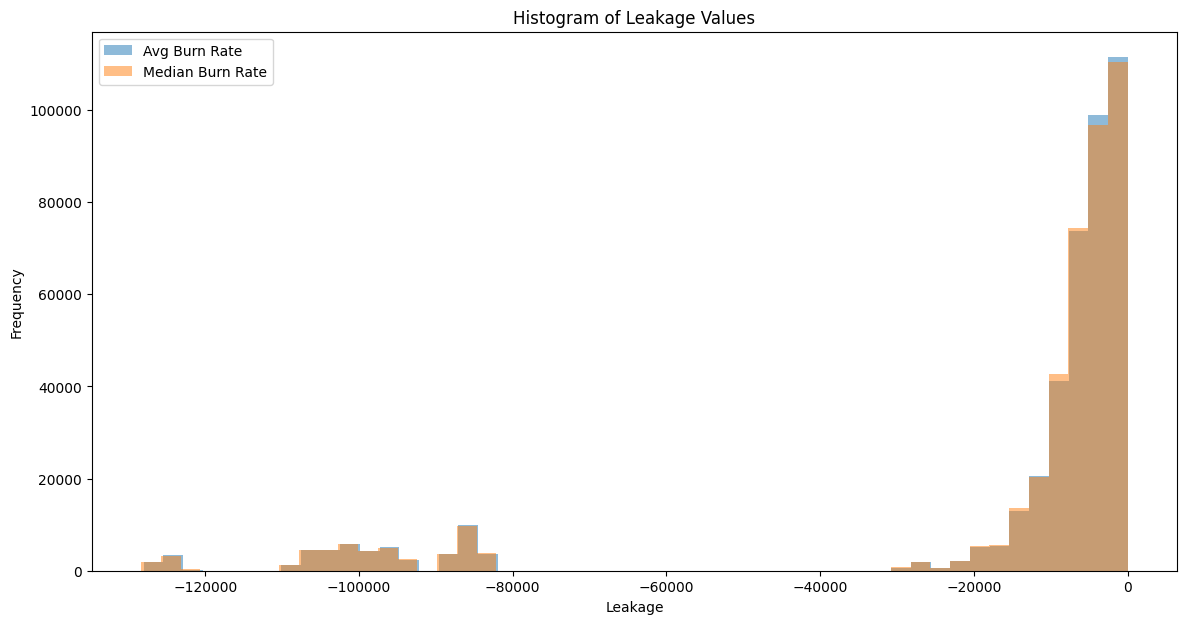

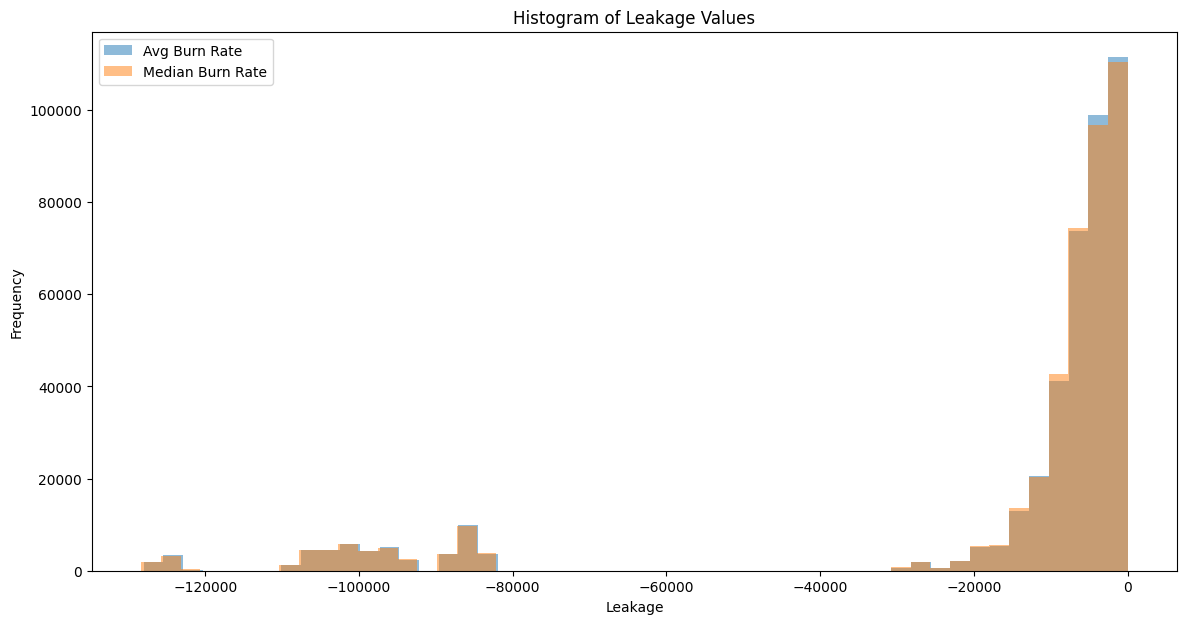

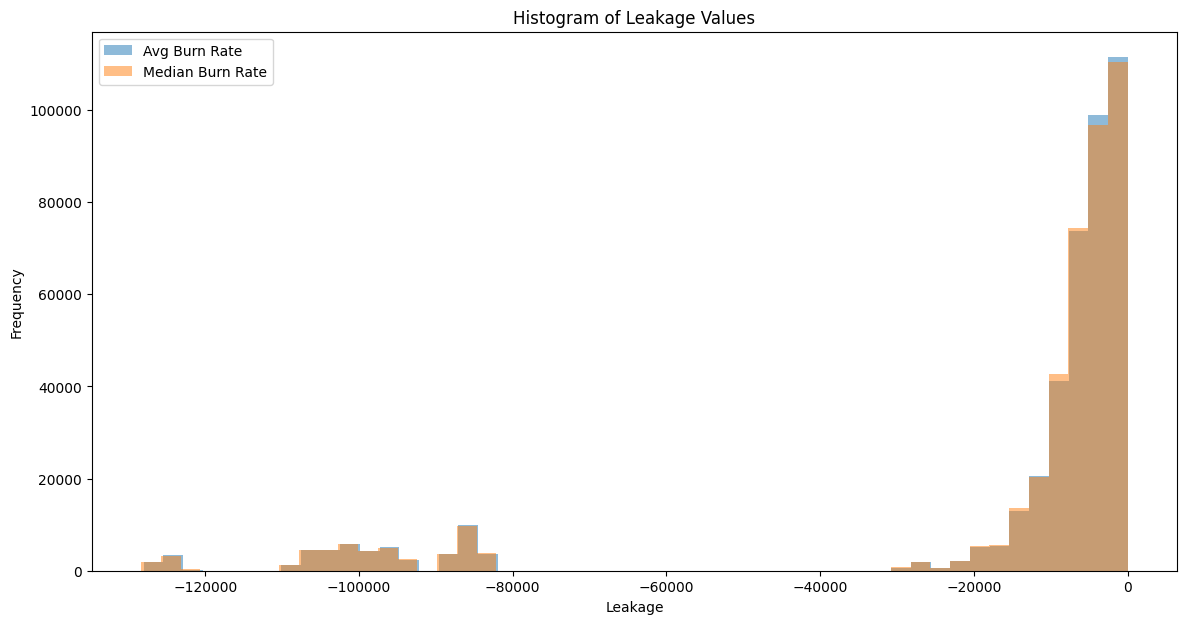

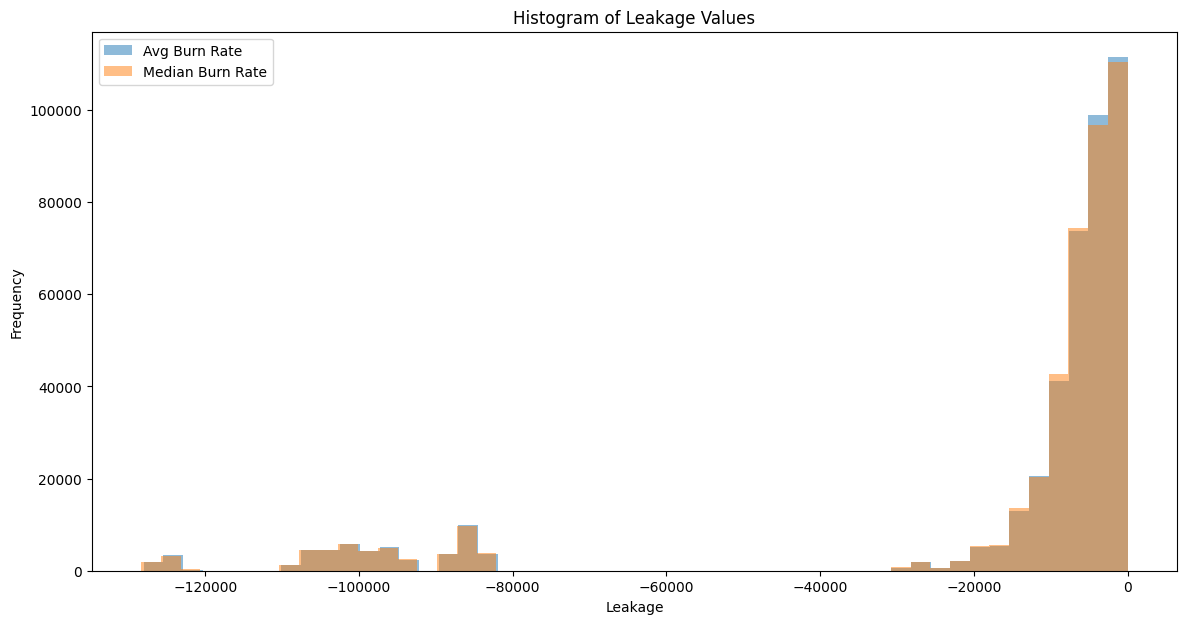

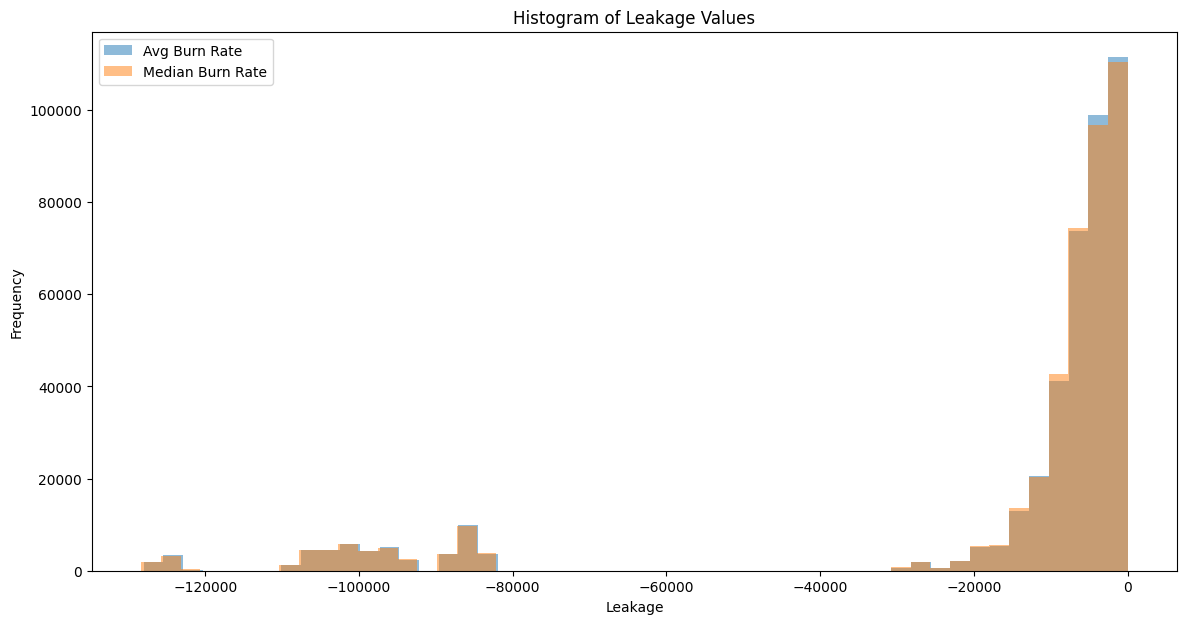

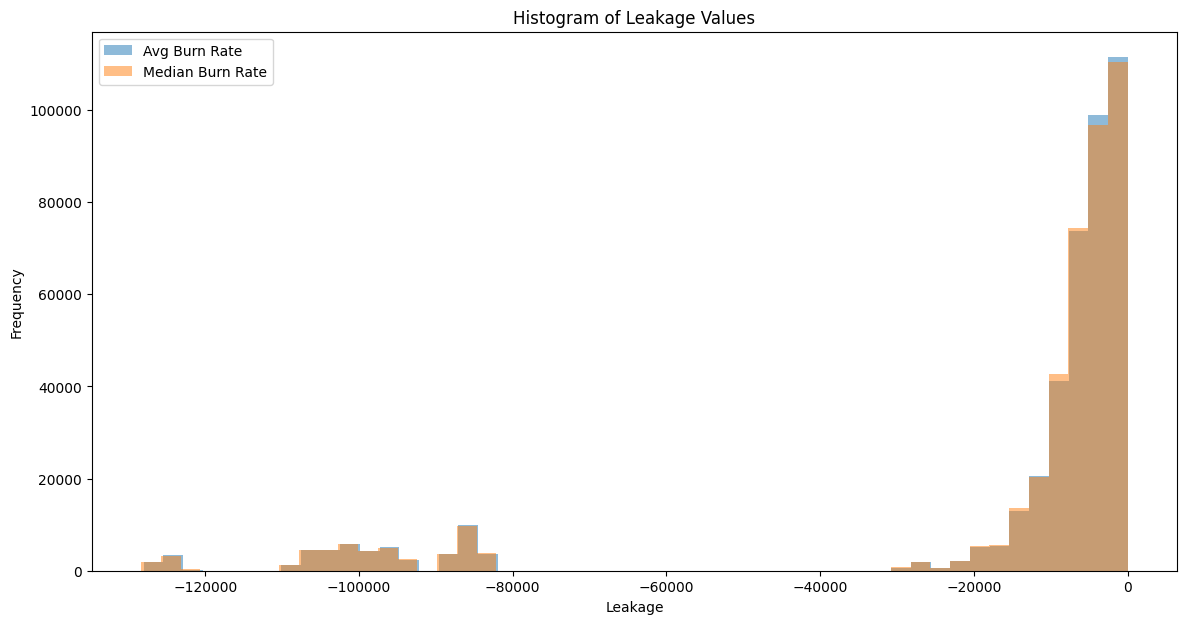

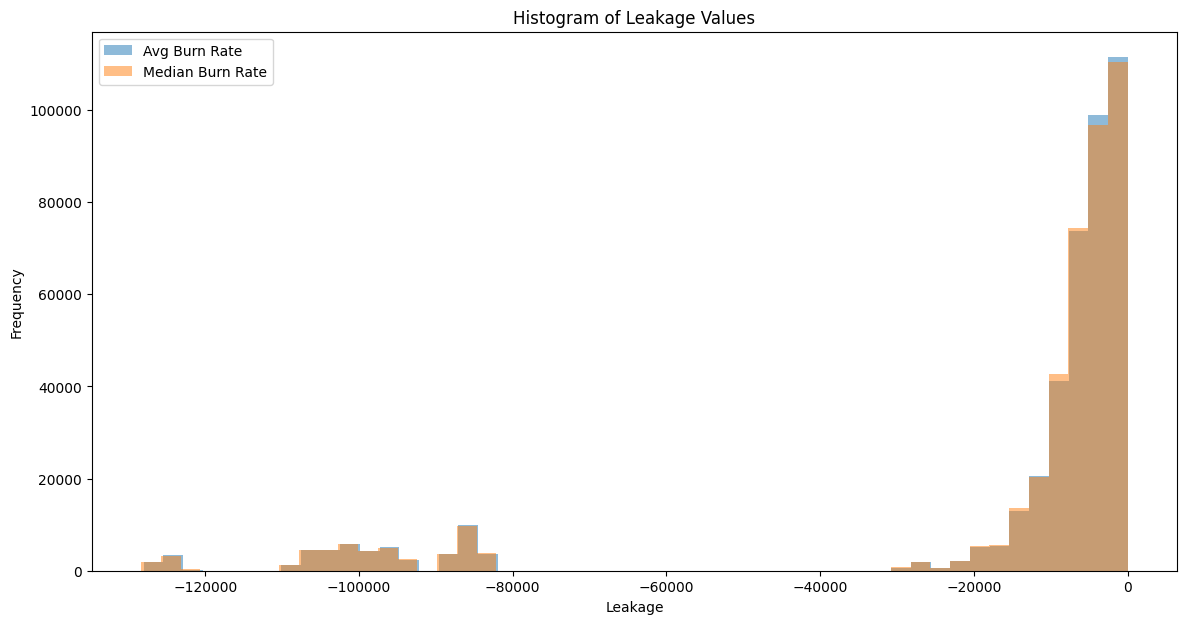

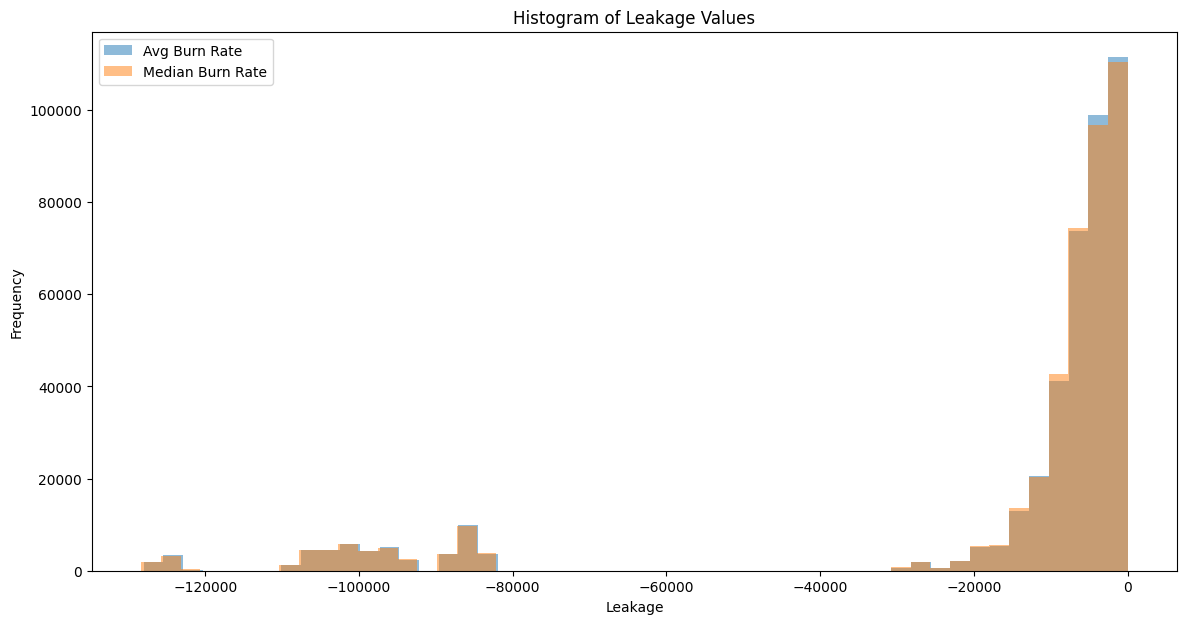

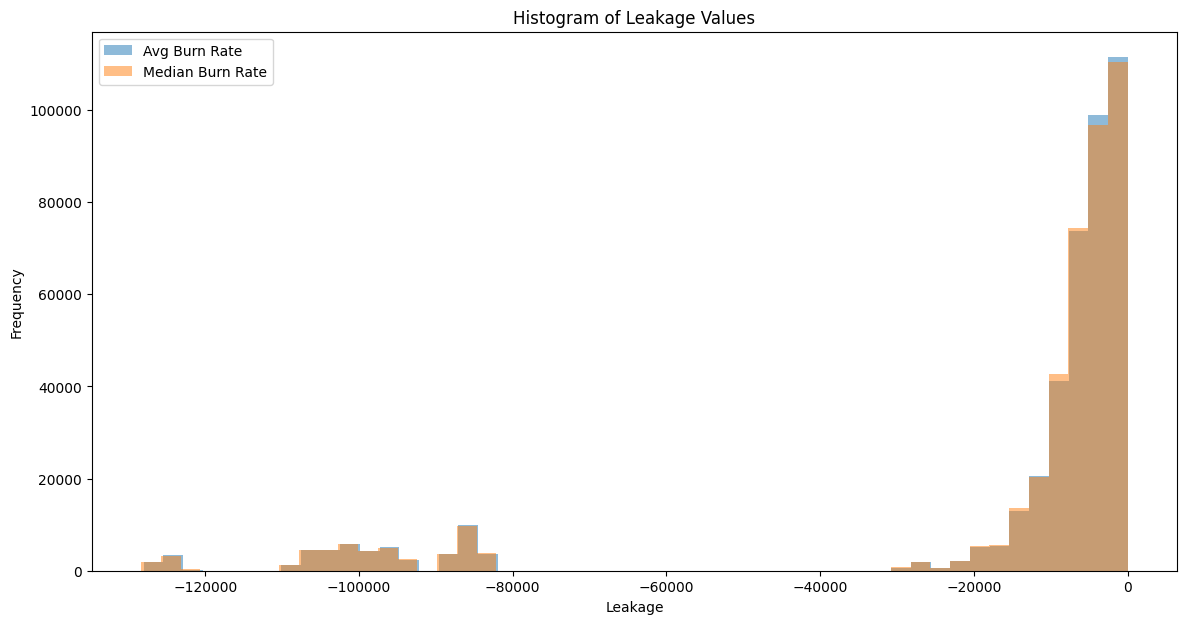

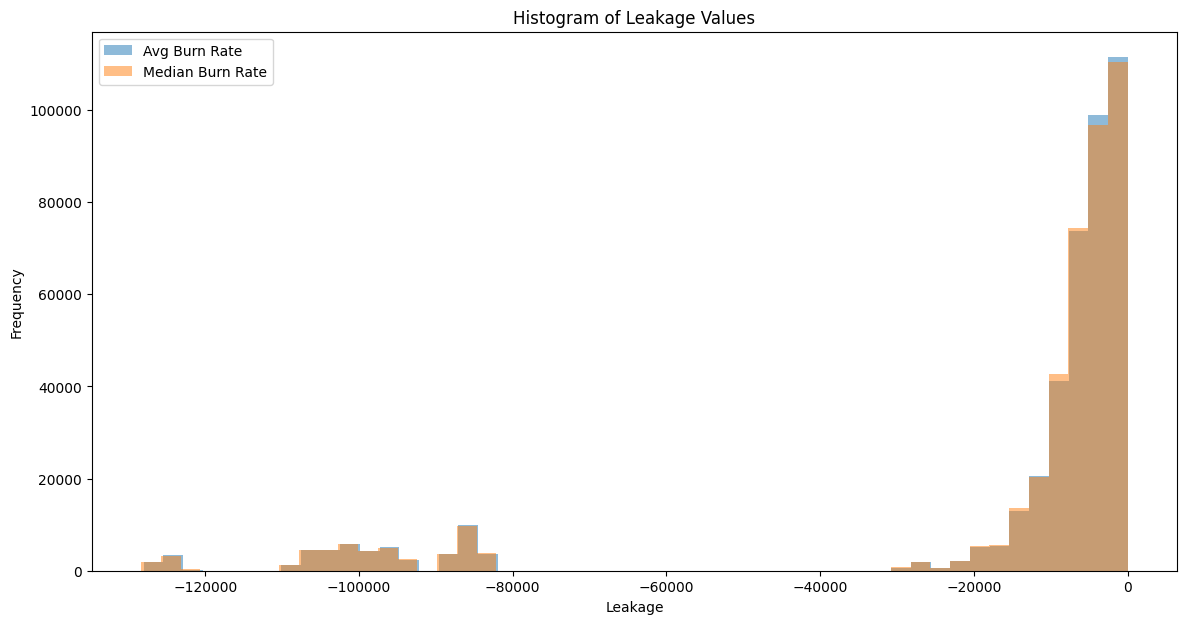

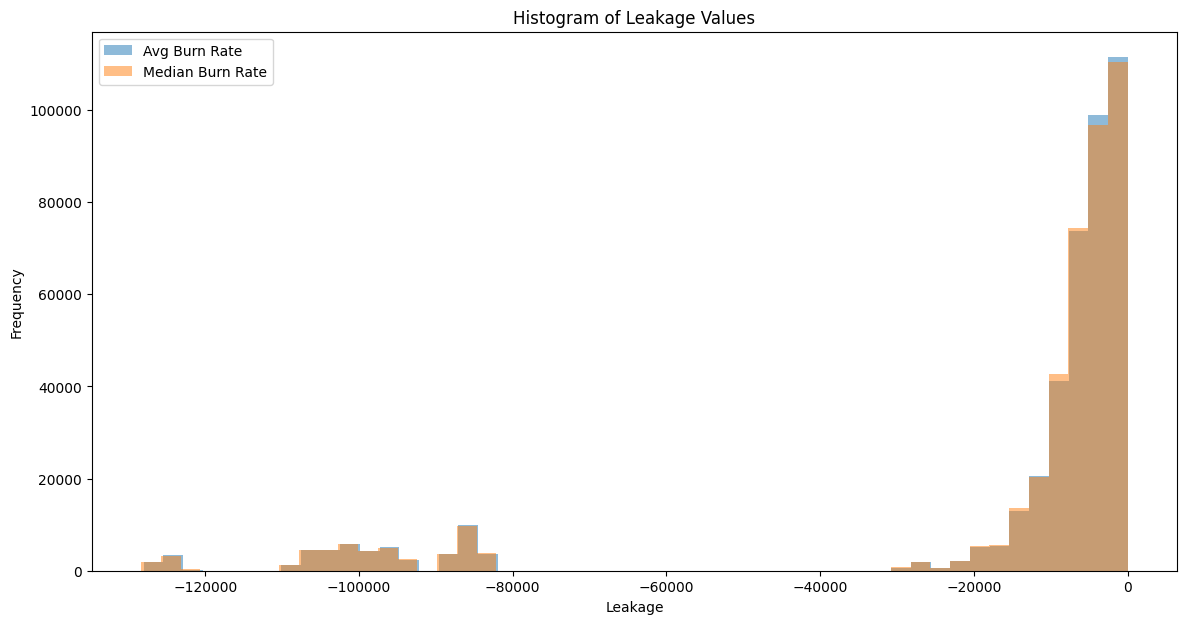

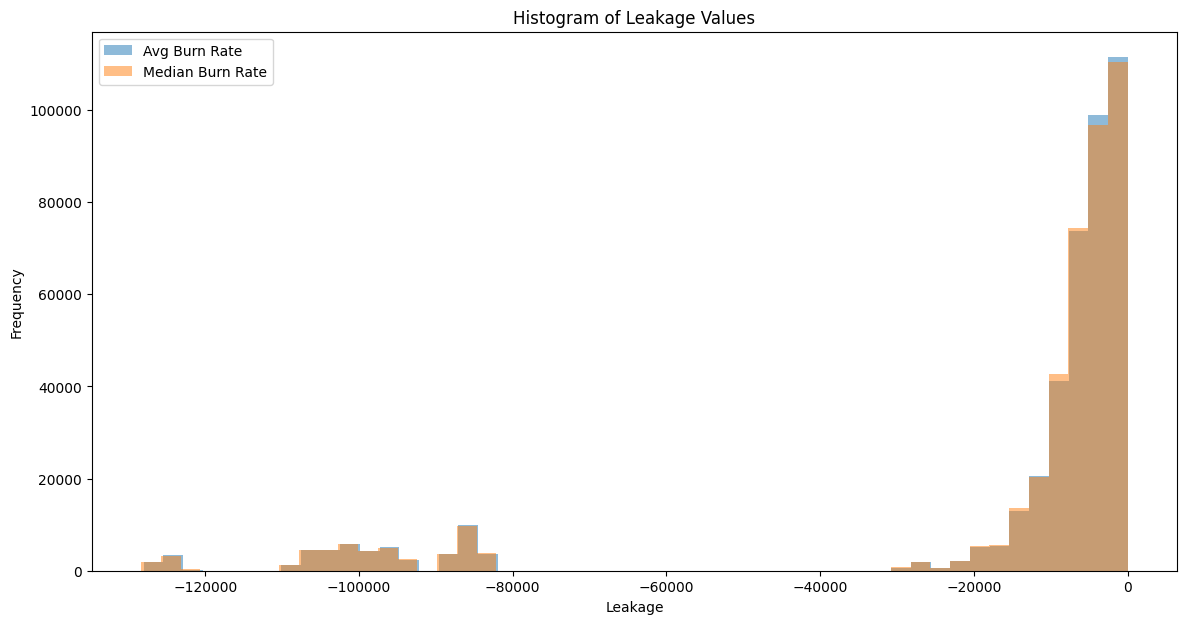

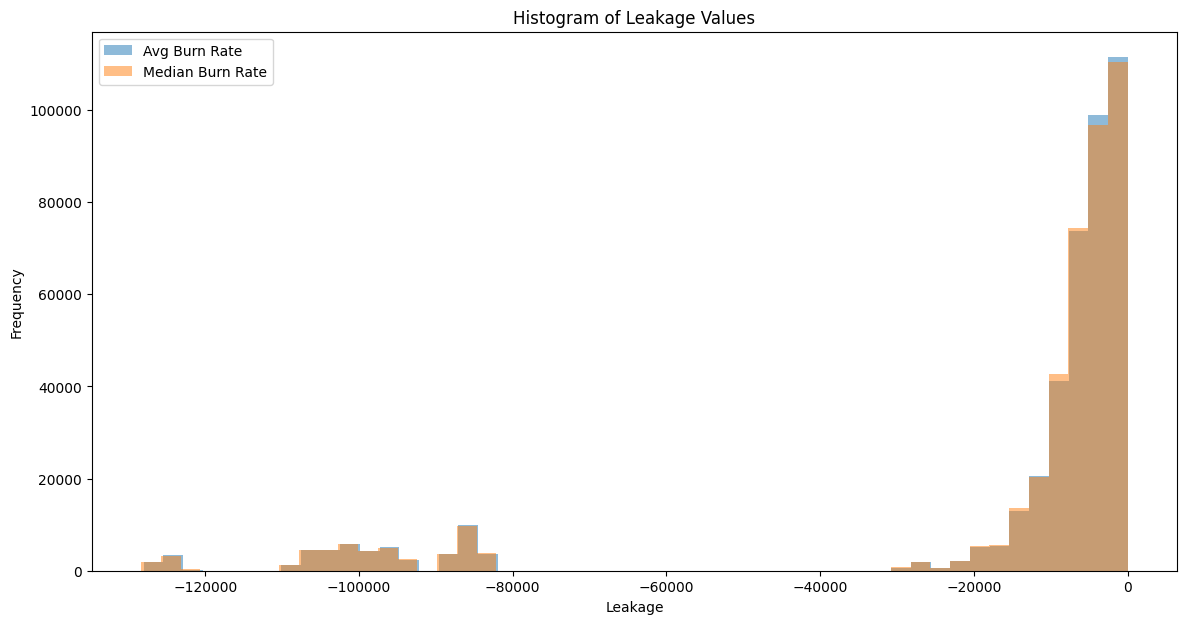

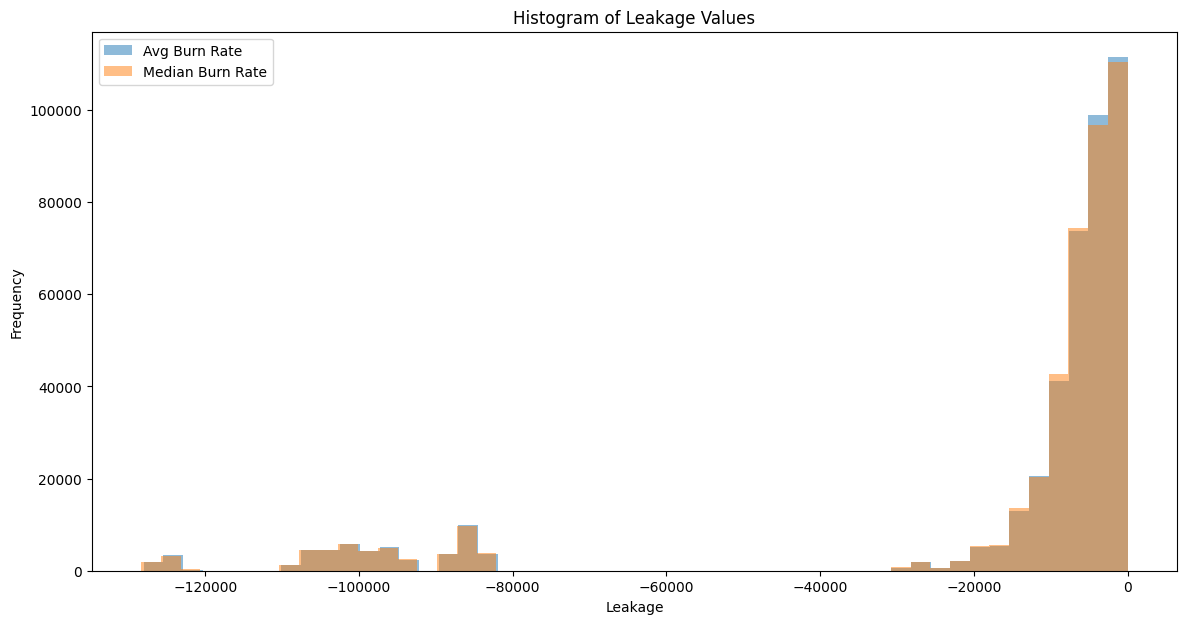

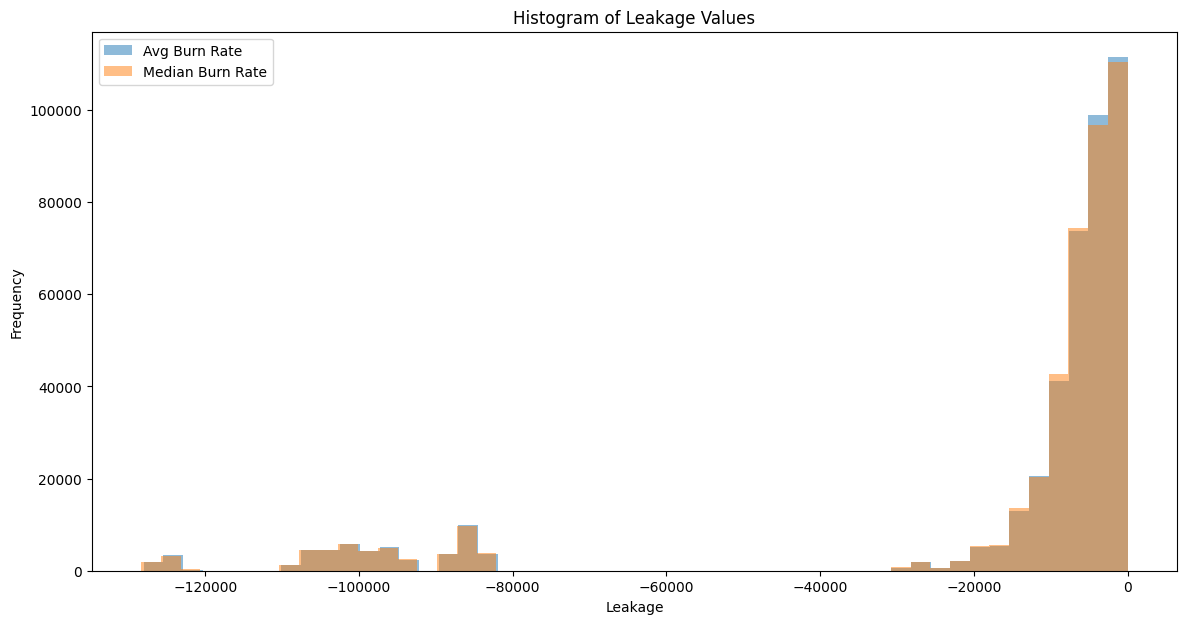

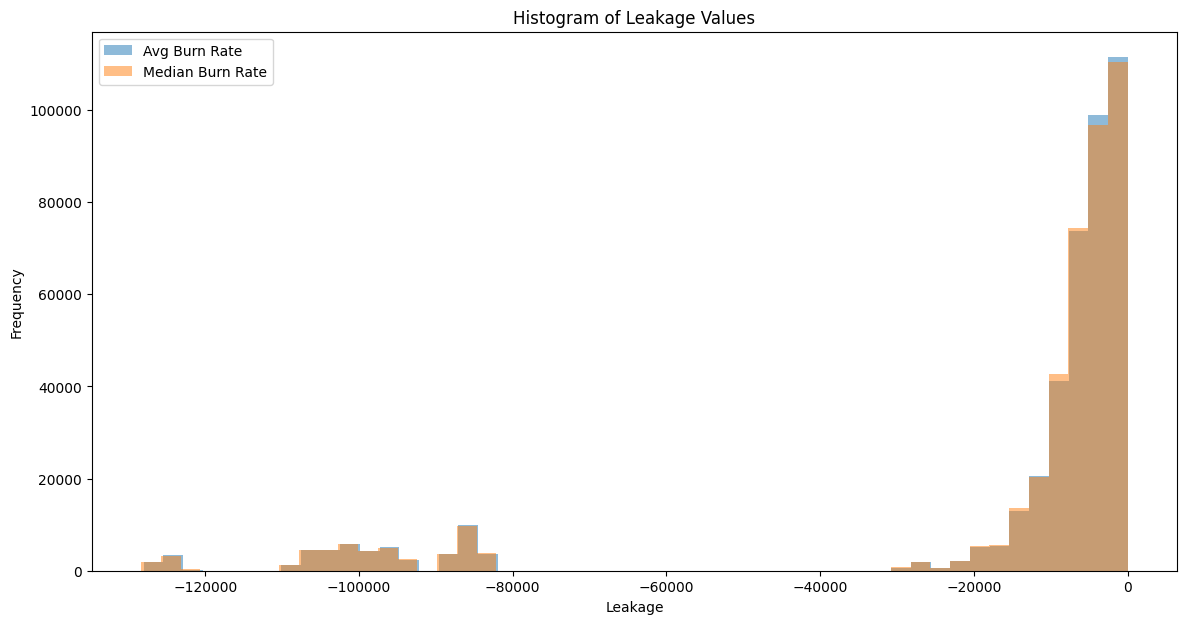

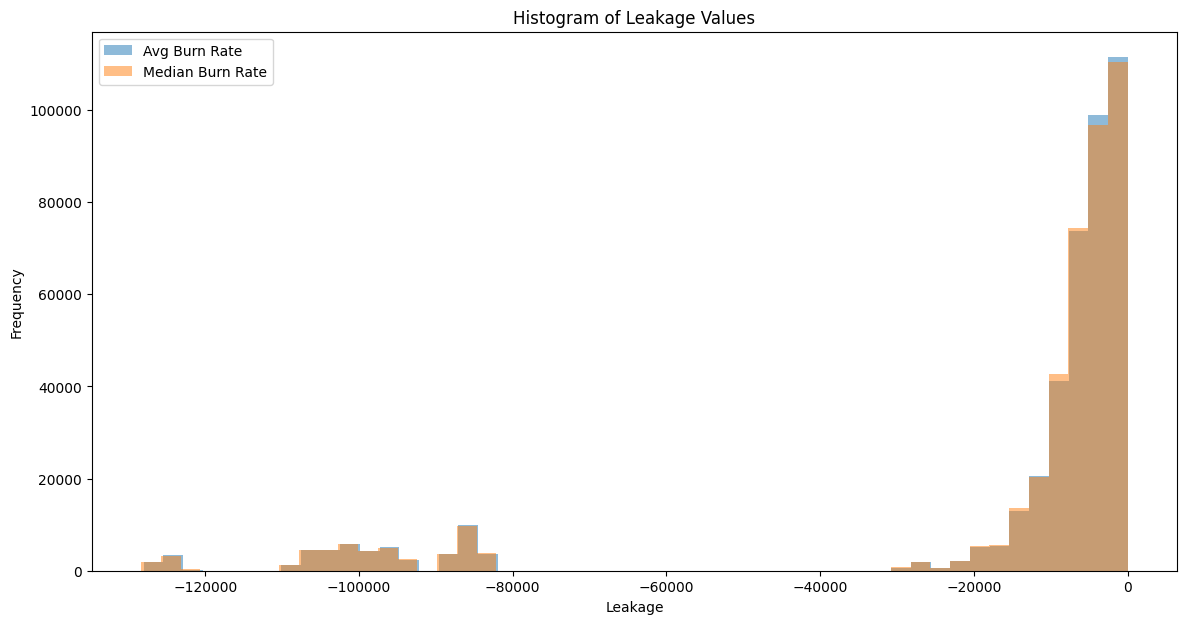

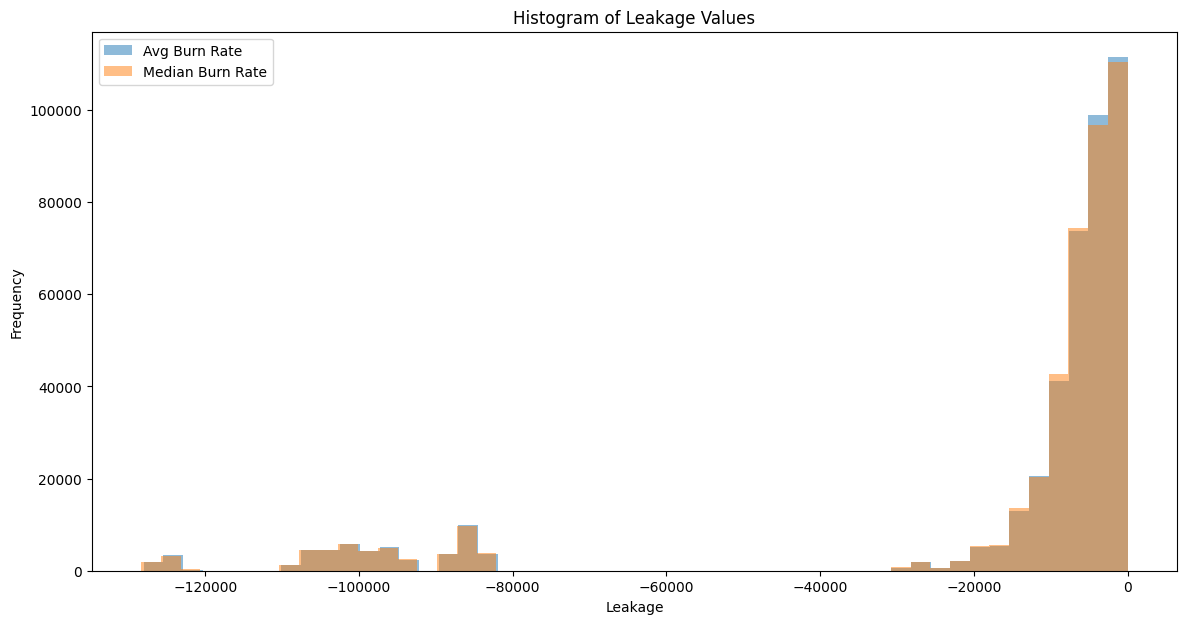

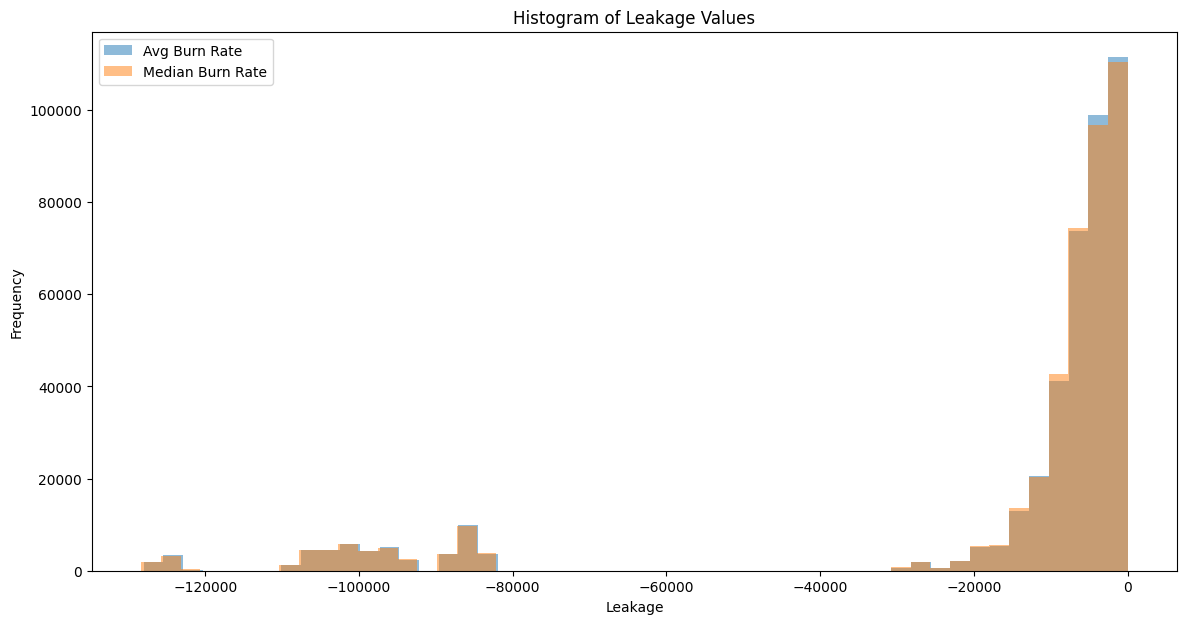

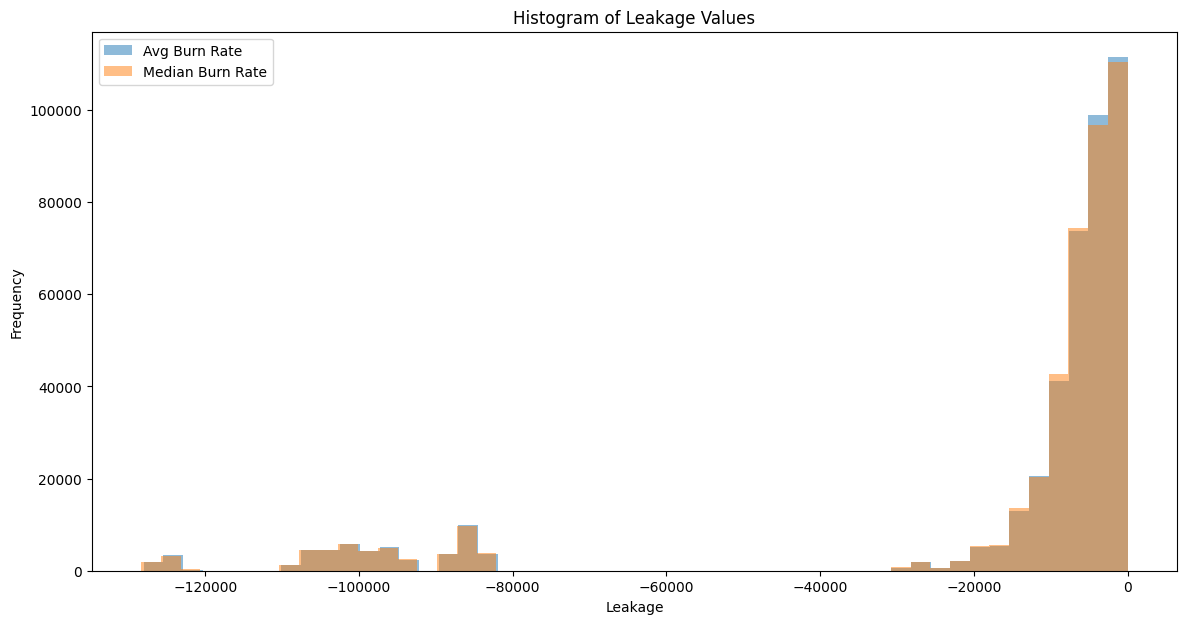

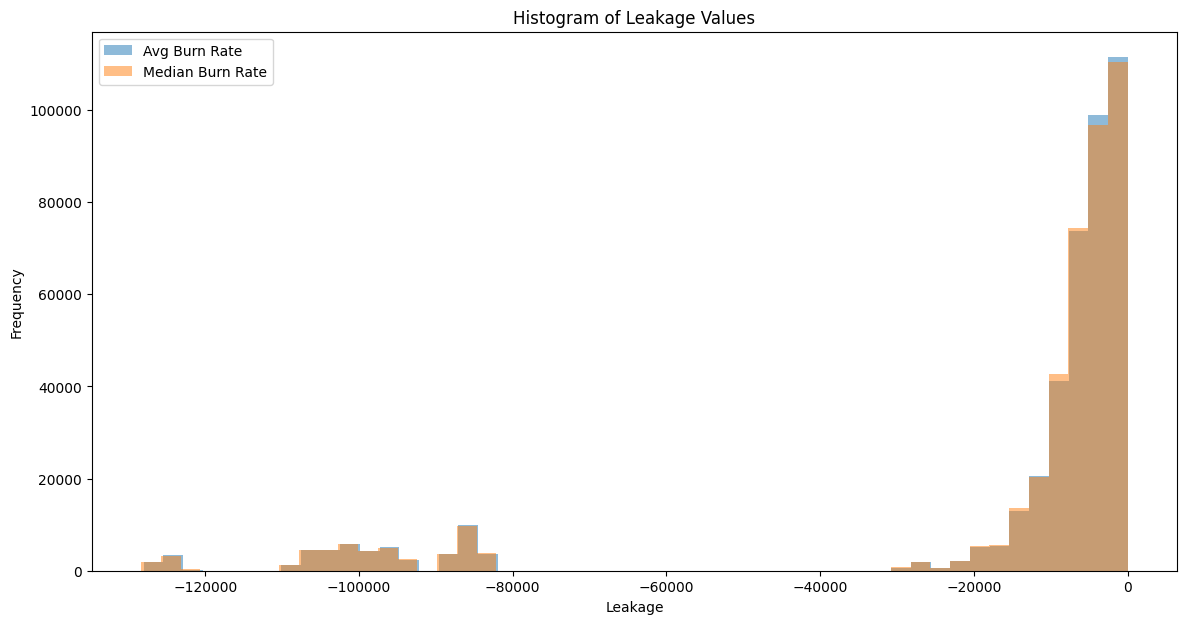

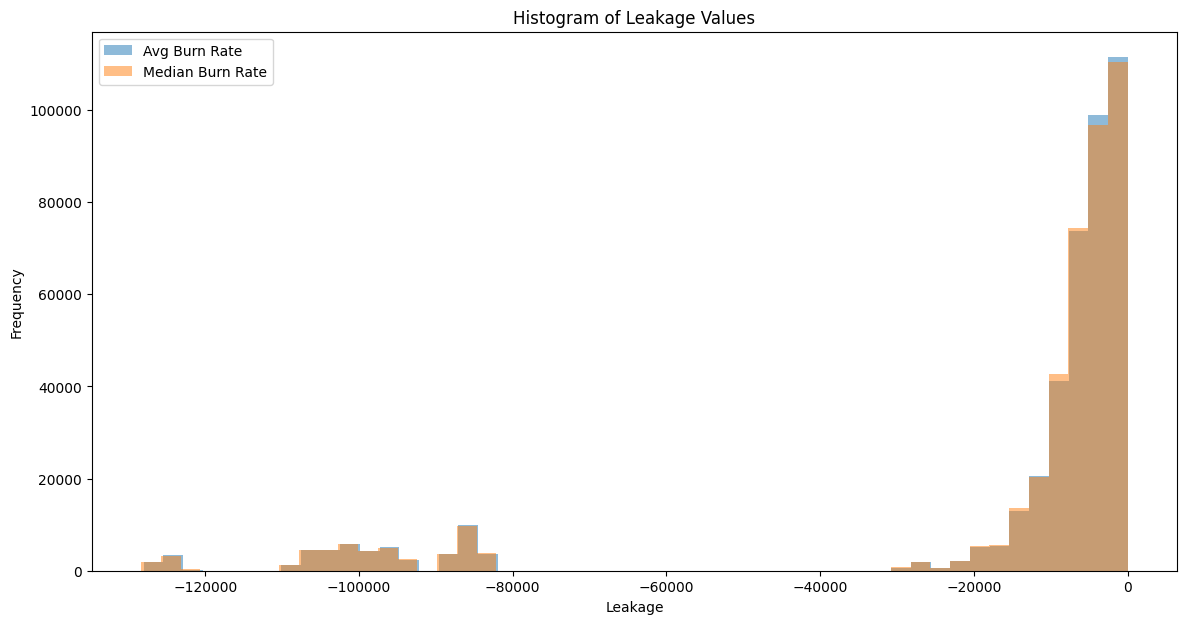

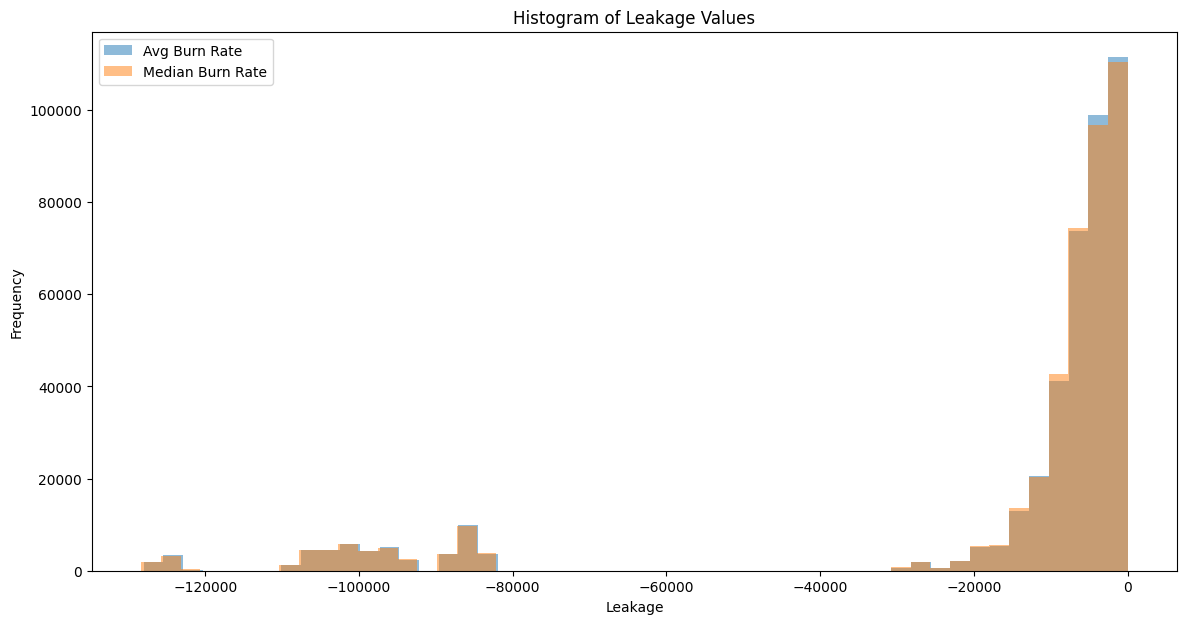

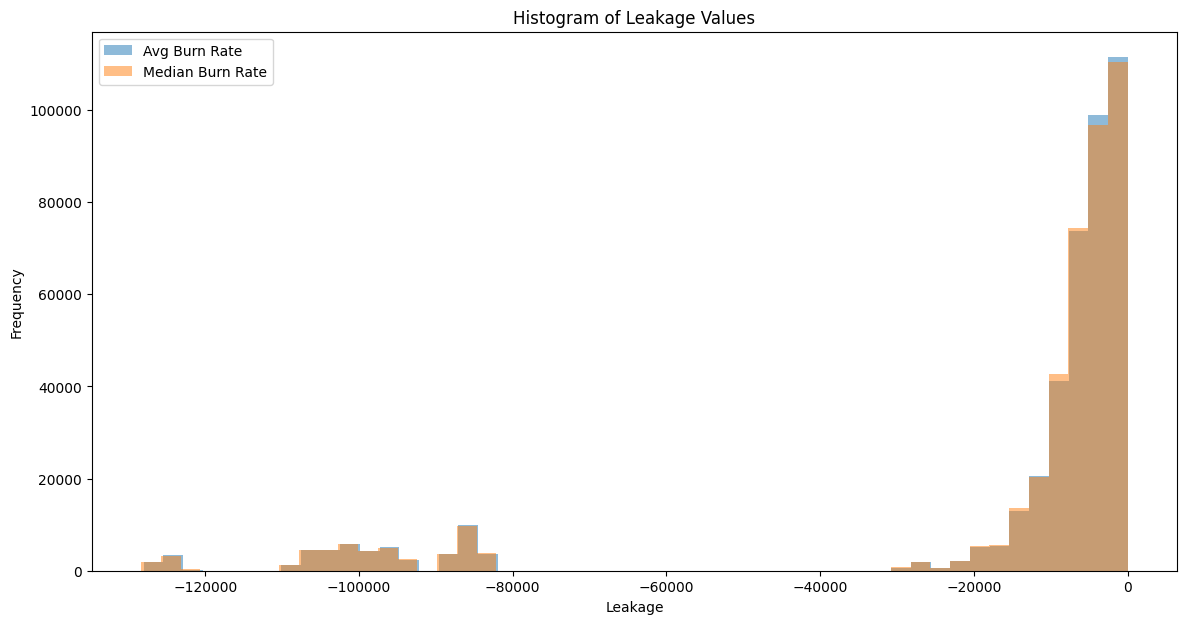

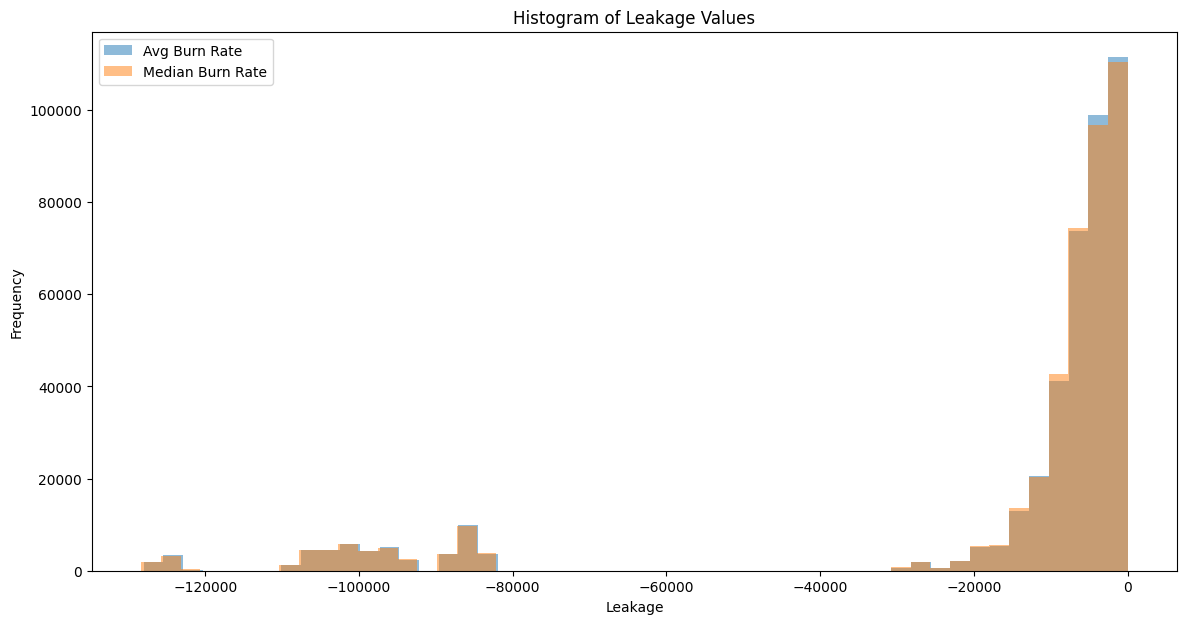

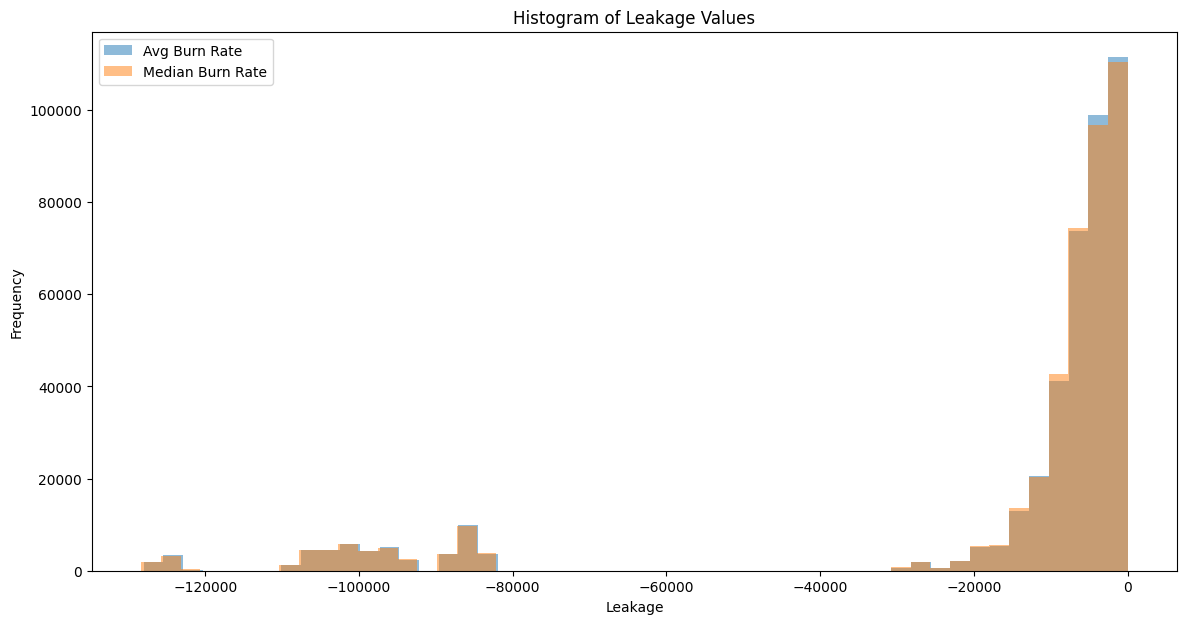

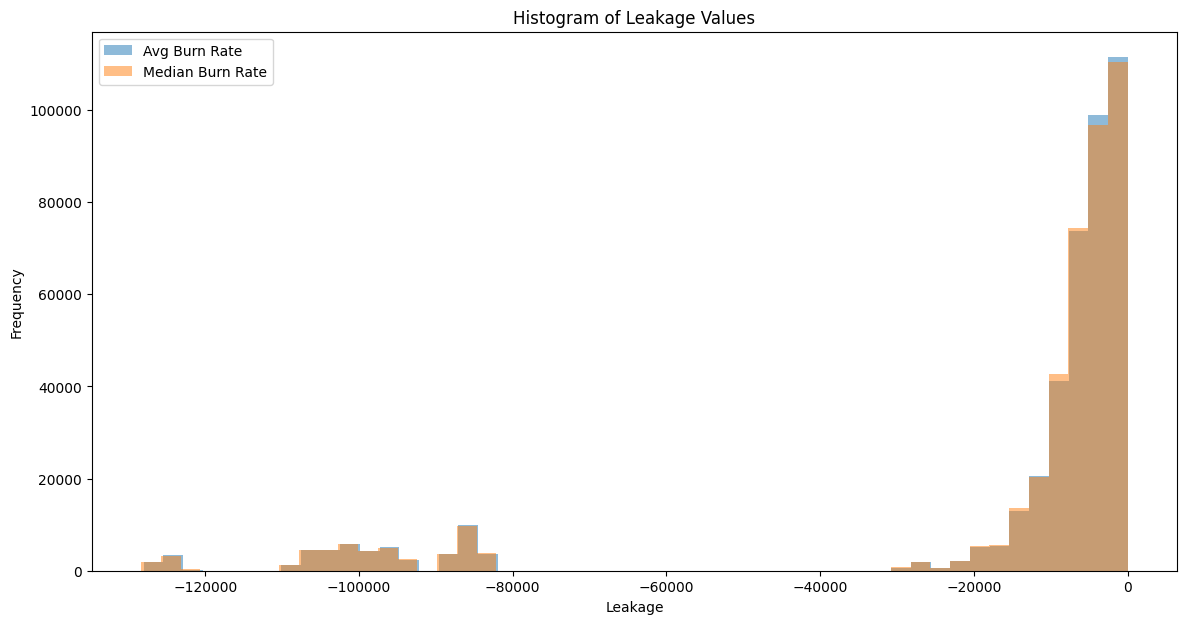

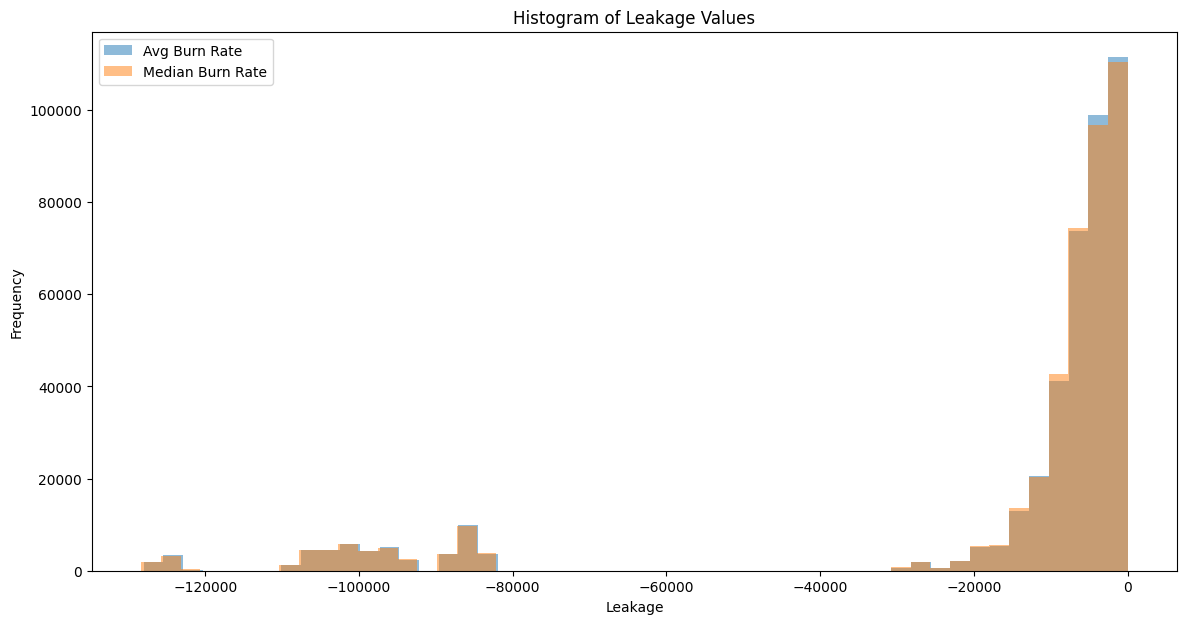

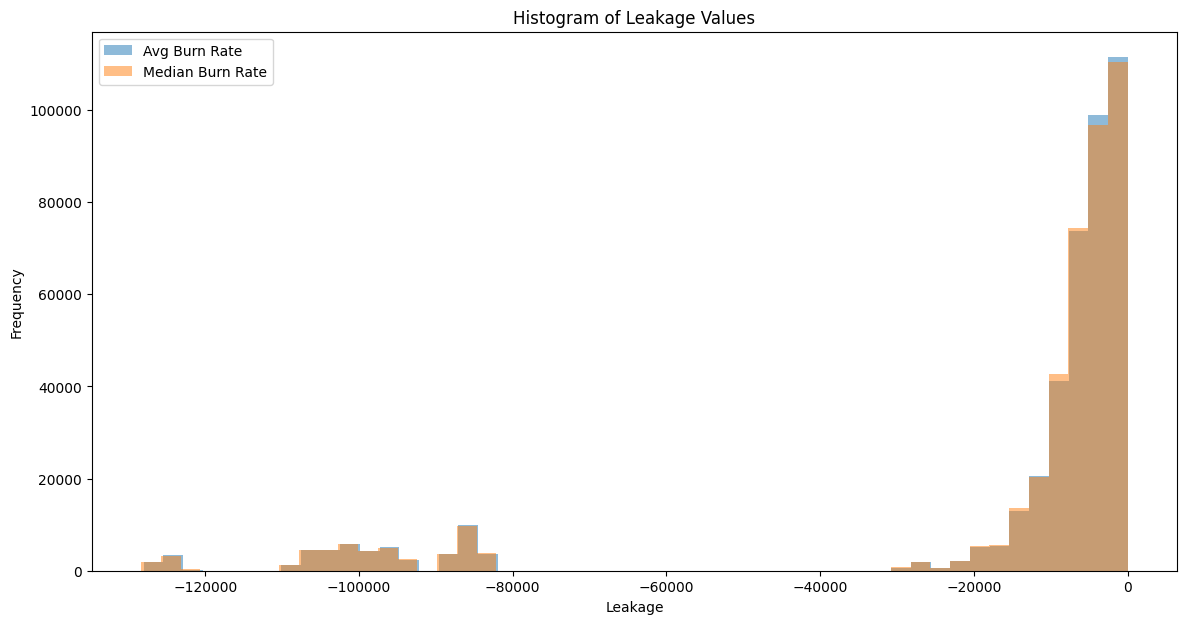

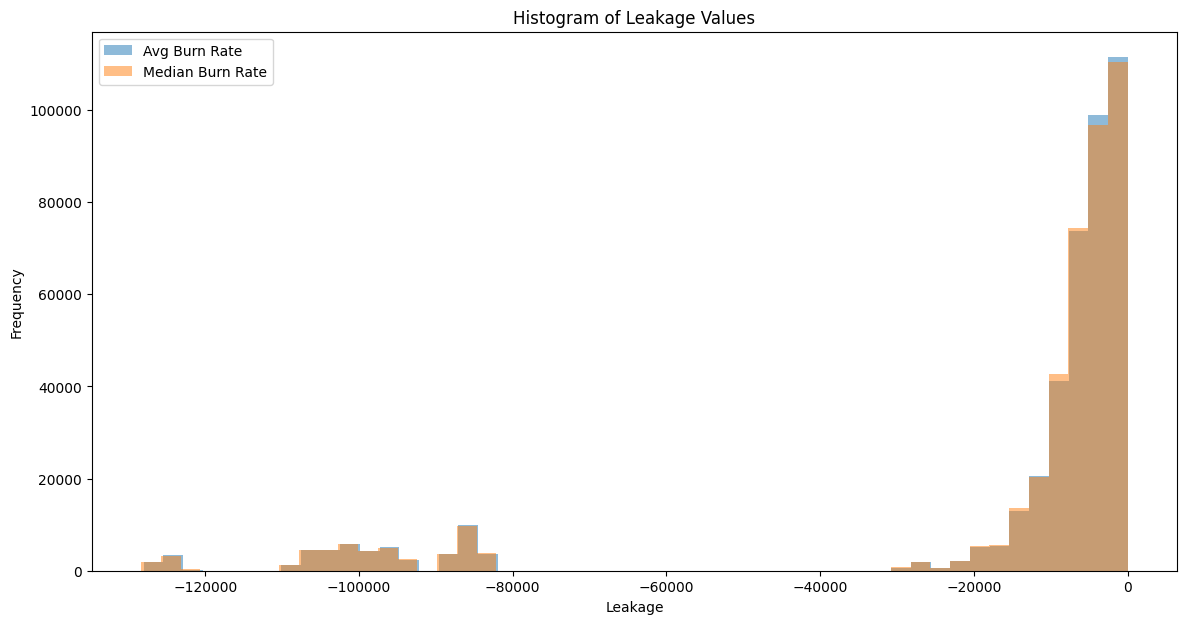

In [69]:
# Histogram to see how big ar the leakages

for element in list(msn10["Flight"].unique()):


  # Filter the dataframe for the selected flight
  flight_data = msn10[msn10['Flight'] == element]
  # Histogram of leakage values
  plt.figure(figsize=(14, 7))
  plt.hist(msn10['Leakage_avg_burn_rate'], bins=50, alpha=0.5, label='Avg Burn Rate')
  plt.hist(msn10['Leakage_median_burn_rate'], bins=50, alpha=0.5, label='Median Burn Rate')
  plt.xlabel('Leakage')
  plt.ylabel('Frequency')
  plt.title('Histogram of Leakage Values')
  plt.legend()
  plt.show()


In [70]:
# Calculate the average burn rate per second if you haven't already
average_burn_rate_per_second = msn10['FUEL_USED_TOTAL'].sum() / msn10['Time_diff_seconds'].sum()

# Define a function to interpolate missing fuel data using the average burn rate per second
def interpolate_fuel_used(group):
    # Calculate the time difference in seconds for each row
    group['Time_diff_seconds'] = group['UTC_TIME'].diff().dt.total_seconds().fillna(0)
    # Calculate the expected fuel used for each row using the average burn rate
    group['Expected_Fuel_Used'] = group['Time_diff_seconds'] * average_burn_rate_per_second
    # Fill NaN values in 'Fuel_Used_Total' with the expected values
    group['FUEL_USED_TOTAL'] = group['FUEL_USED_TOTAL'].fillna(group['Expected_Fuel_Used'])
    return group

# Apply the interpolation function to each flight group
msn10 = msn10.groupby('Flight').apply(interpolate_fuel_used)

# Now, you can recalculate the FOB_change_cumulative based on the filled data
msn10['FOB_change_cumulative'] = msn10.groupby('Flight')['FUEL_USED_TOTAL'].cumsum()


<ipython-input-70-2f3de46ee763>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  msn10 = msn10.groupby('Flight').apply(interpolate_fuel_used)


#  00 OTHER APPROACH WITH ANOMALIES

## Count Fligh Phase and see Altitude per flight in Flight Phase

In [44]:
import pandas as pd
import matplotlib.pyplot as plt



# 1) Check if there are Flights not covering all flight phases
flight_phases_per_flight = msn10.groupby('Flight')['FLIGHT_PHASE_COUNT'].nunique()
max_phases = flight_phases_per_flight.max()
flights_full_phase_coverage = flight_phases_per_flight[flight_phases_per_flight == max_phases]

# 2) Count how many counts we have for each FLIGHT_PHASE_COUNT
phase_counts = msn10['FLIGHT_PHASE_COUNT'].value_counts()

# 3) Show the Altitudes per flight phase (per Flight as a chart)
# This assumes your data is structured with one row per flight phase per flight.
# You might need to adjust this code based on your actual data structure.
for flight in msn10['Flight'].unique():
    flight_data = msn10[msn10['Flight'] == flight]
    plt.figure()
    for phase in flight_data['FLIGHT_PHASE_COUNT'].unique():
        phase_data = flight_data[flight_data['FLIGHT_PHASE_COUNT'] == phase]
        plt.scatter(phase_data['FLIGHT_PHASE_COUNT'], phase_data['FW_GEO_ALTITUDE'], label=f'Phase {phase}')
    plt.title(f'Flight {flight} Altitude per Phase')
    plt.xlabel('Flight Phase Count')
    plt.ylabel('FW Geo Altitude')
    plt.legend()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [14]:
phase_counts

8.0     425238
2.0      61455
11.0     36883
9.0       7366
7.0       4517
6.0       1117
10.0       902
3.0        628
5.0        446
1.0        427
4.0        233
12.0        32
0.0          2
Name: FLIGHT_PHASE_COUNT, dtype: int64

## Filter dataset for FLIGHT PHASE 8

In [16]:
msn10_fl8=msn10[msn10["FLIGHT_PHASE_COUNT"]==8]

In [18]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows

# Your DataFrame creation code
data1 = {}
data1['Features'] = list(msn10_fl8.columns)
data1['msn10_fl8'] = list(msn10_fl8.isnull().sum())
data1['msn10_fl8%'] = [round(x/msn10_fl8.shape[0]*100, 2) for x in list(msn10_fl8.isnull().sum())]
data1['n_unique'] = list(msn10_fl8.nunique())

df = pd.DataFrame(data1)
df

,Features,msn10_fl8,msn10_fl8%,n_unique
0,UTC_TIME,0,0.0,425238
1,FUEL_USED_2,425238,100.0,0
2,FUEL_USED_3,425238,100.0,0
3,FUEL_USED_4,425238,100.0,0
4,FW_GEO_ALTITUDE,0,0.0,33733
5,VALUE_FOB,0,0.0,38255
6,VALUE_FUEL_QTY_CT,0,0.0,10911
7,VALUE_FUEL_QTY_FT1,0,0.0,707
8,VALUE_FUEL_QTY_FT2,0,0.0,1137
9,VALUE_FUEL_QTY_FT3,0,0.0,965


In [24]:
msn10_fl8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425238 entries, 2096 to 621609
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UTC_TIME            425238 non-null  object 
 1   FUEL_USED_2         0 non-null       float64
 2   FUEL_USED_3         0 non-null       float64
 3   FUEL_USED_4         0 non-null       float64
 4   FW_GEO_ALTITUDE     425238 non-null  float64
 5   VALUE_FOB           425238 non-null  float64
 6   VALUE_FUEL_QTY_CT   425238 non-null  float64
 7   VALUE_FUEL_QTY_FT1  425238 non-null  float64
 8   VALUE_FUEL_QTY_FT2  425238 non-null  float64
 9   VALUE_FUEL_QTY_FT3  425238 non-null  float64
 10  VALUE_FUEL_QTY_FT4  425238 non-null  float64
 11  VALUE_FUEL_QTY_LXT  425238 non-null  float64
 12  VALUE_FUEL_QTY_RXT  425238 non-null  float64
 13  FLIGHT_PHASE_COUNT  425238 non-null  float64
 14  FUEL_USED_1         0 non-null       float64
 15  Flight              425238 non-

In [25]:
msn10_fl8.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN
2096,2014-07-25 12:44:49,NaN,NaN,NaN,1631.0,29270.0,12.0,1799.0,2533.0,2459.0,1825.0,10294.0,10349.0,8.0,NaN,11.0,F-RBAC
2097,2014-07-25 12:44:50,NaN,NaN,NaN,1663.0,29268.0,12.0,1797.0,2529.0,2465.0,1828.0,10293.0,10345.0,8.0,NaN,11.0,F-RBAC
2098,2014-07-25 12:44:51,NaN,NaN,NaN,1697.0,29272.0,11.0,1796.0,2530.0,2464.0,1835.0,10289.0,10348.0,8.0,NaN,11.0,F-RBAC
2099,2014-07-25 12:44:52,NaN,NaN,NaN,1732.0,29268.0,10.0,1793.0,2525.0,2468.0,1840.0,10282.0,10351.0,8.0,NaN,11.0,F-RBAC
2100,2014-07-25 12:44:53,NaN,NaN,NaN,1767.0,29272.0,10.0,1792.0,2519.0,2472.0,1846.0,10271.0,10363.0,8.0,NaN,11.0,F-RBAC


In [26]:
msn10_fl8.dtypes

UTC_TIME               object
FUEL_USED_2           float64
FUEL_USED_3           float64
FUEL_USED_4           float64
FW_GEO_ALTITUDE       float64
VALUE_FOB             float64
VALUE_FUEL_QTY_CT     float64
VALUE_FUEL_QTY_FT1    float64
VALUE_FUEL_QTY_FT2    float64
VALUE_FUEL_QTY_FT3    float64
VALUE_FUEL_QTY_FT4    float64
VALUE_FUEL_QTY_LXT    float64
VALUE_FUEL_QTY_RXT    float64
FLIGHT_PHASE_COUNT    float64
FUEL_USED_1           float64
Flight                float64
MSN                    object
dtype: object

## Change in FOB per second within EACH FLIGHT

In [35]:
import pandas as pd

# Assuming msn10_fl8 is your DataFrame for flight phase 8

# Step 1: Calculate the change in FOB for each second within each flight
msn10_fl8['FOB_change'] = msn10_fl8.groupby('Flight')['VALUE_FOB'].diff().abs()
msn10_fl8["ALTITUDE_change"]=msn10_fl8.groupby("Flight")["FW_GEO_ALTITUDE"].diff().abs()

# It's common to have the first row of each group with a NaN value in the diff column (since there's no previous row to compare within the group),
# so you can fill these NaN values with zeros if appropriate
msn10_fl8['FOB_change'] = msn10_fl8['FOB_change'].fillna(0)
msn10_fl8['ALTITUDE_change'] = msn10_fl8['ALTITUDE_change'].fillna(0)

msn10_

# Step 2: Summarize the total change in FOB for each flight
# This sum gives an approximation of fuel consumption for each flight during flight phase 8
fuel_consumption_by_flight = msn10_fl8.groupby('Flight')['FOB_change'].sum()

# Display the fuel consumption by flight
print(fuel_consumption_by_flight)


Flight
11.0      17194.000000
42.0      19765.000000
51.0       6197.000000
53.0       8403.000000
60.0       9673.000000
62.0       4284.000000
82.0      25268.000000
92.0      35795.000000
109.0     18941.000000
111.0     46403.000000
122.0     21099.000000
123.0     22804.000000
127.0     46347.000000
132.0     37751.000000
136.0     16744.000000
139.0     24958.000000
143.0    145416.000000
173.0         0.000000
180.0     23415.000000
181.0      6356.000000
184.0     16167.000000
196.0     41564.000000
232.0      4922.000000
235.0     12152.000000
239.0     12347.000000
248.0     44205.000000
254.0     60252.000000
266.0     50901.000000
292.0      9938.000000
295.0     37934.000000
298.0    165897.548828
329.0     40440.000000
401.0     12015.000000
402.0      4011.000000
454.0      7725.000000
487.0      6399.000000
492.0     12758.000000
536.0     50202.000000
539.0      4221.000000
Name: FOB_change, dtype: float64


<ipython-input-35-582c289bcfe6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn10_fl8['FOB_change'] = msn10_fl8.groupby('Flight')['VALUE_FOB'].diff().abs()
<ipython-input-35-582c289bcfe6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msn10_fl8["ALTITUDE_change"]=msn10_fl8.groupby("Flight")["FW_GEO_ALTITUDE"].diff().abs()
<ipython-input-35-582c289bcfe6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

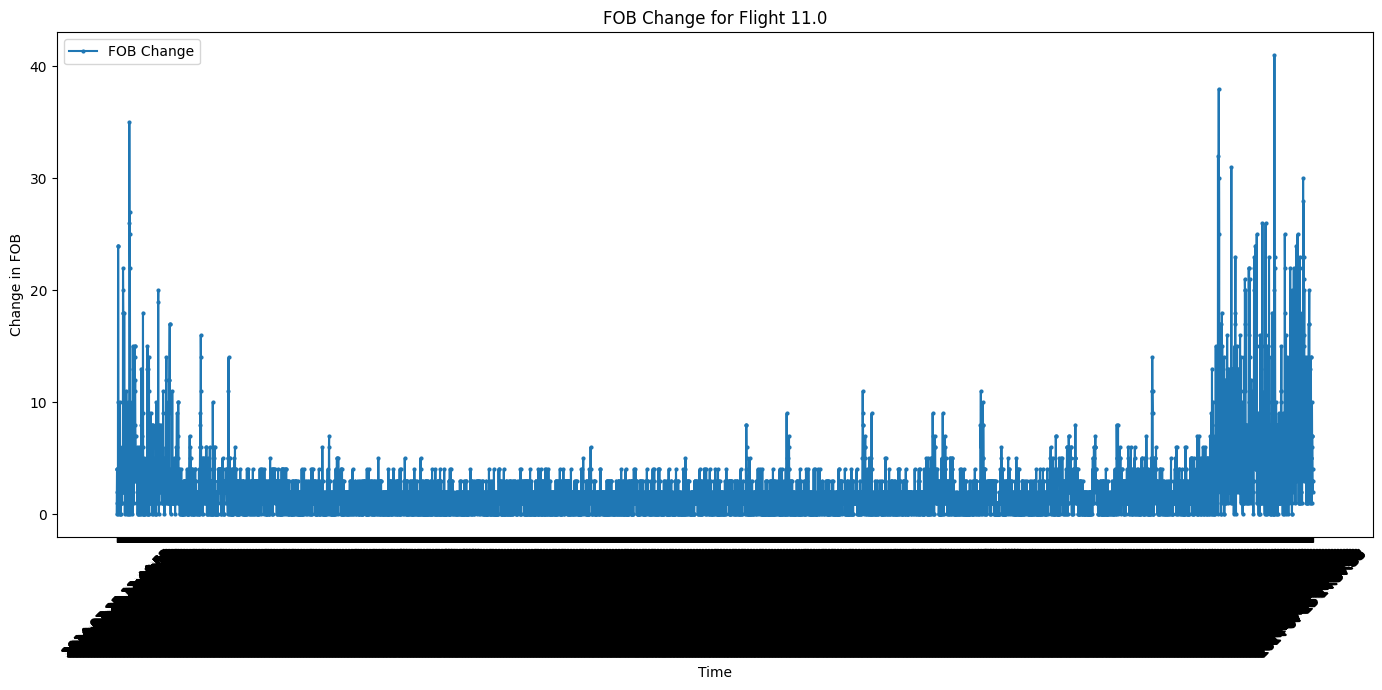

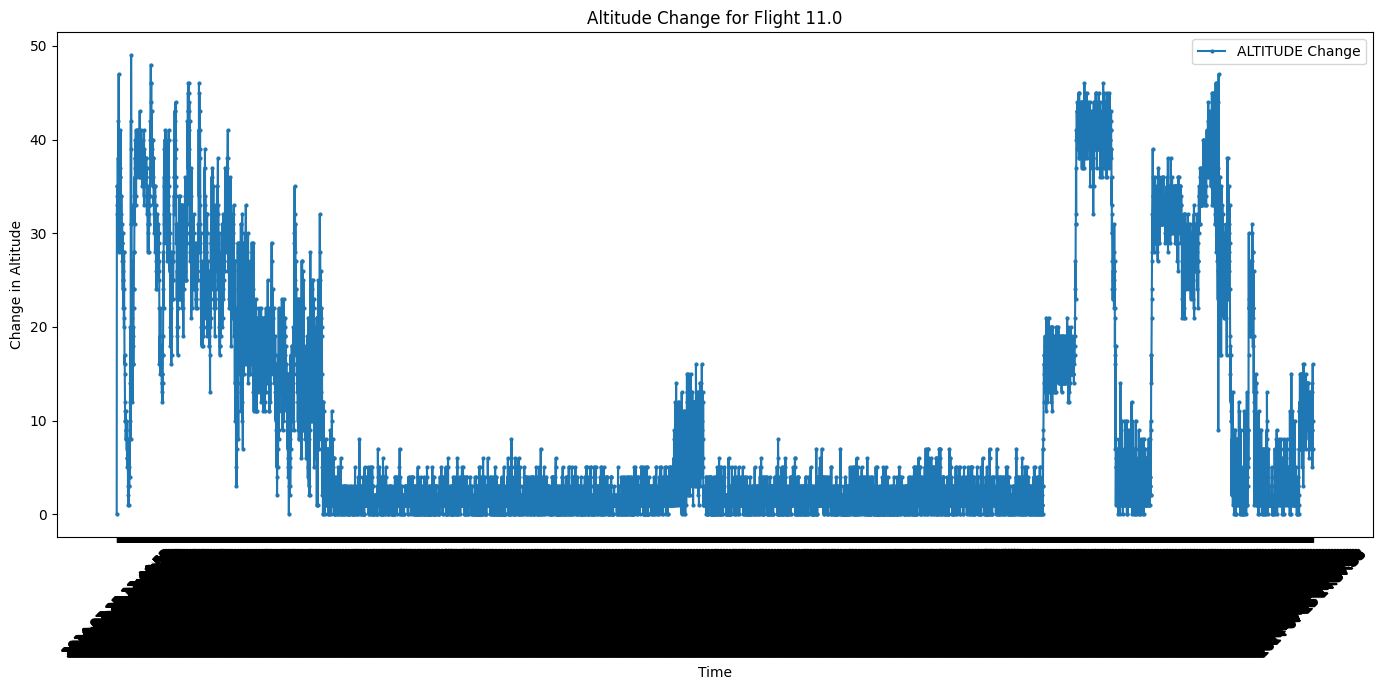

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming msn10_fl8 is already filtered for flight phase 8

# Example: Visualize FOB_change for the first flight in the dataset
flight_numbers = msn10_fl8['Flight'].unique()
flight_number = flight_numbers[0]  # Adjust this as needed to analyze different flights

# Filter for a single flight
single_flight_data = msn10_fl8[msn10_fl8['Flight'] == flight_number]

# Plotting FOB_change to visualize potential leakage points
plt.figure(figsize=(14, 7))
plt.plot(single_flight_data['UTC_TIME'], single_flight_data['FOB_change'], label='FOB Change', marker='o', linestyle='-', markersize=2)
plt.title(f'FOB Change for Flight {flight_number}')
plt.xlabel('Time')
plt.ylabel('Change in FOB')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting FOB_change to visualize potential leakage points
plt.figure(figsize=(14, 7))
plt.plot(single_flight_data['UTC_TIME'], single_flight_data['ALTITUDE_change'], label='ALTITUDE Change', marker='o', linestyle='-', markersize=2)
plt.title(f'Altitude Change for Flight {flight_number}')
plt.xlabel('Time')
plt.ylabel('Change in Altitude')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Find Anomalies

In [33]:
from scipy.stats import zscore

# Calculate the z-score for the FOB_change values
single_flight_data['FOB_change_zscore'] = zscore(single_flight_data['FOB_change'])

# Filter for significant changes, e.g., where the z-score is above a threshold (e.g., 2 or 3)
significant_changes = single_flight_data[np.abs(single_flight_data['FOB_change_zscore']) > 2]

# Print rows with significant FOB change
print(significant_changes[['UTC_TIME', 'FOB_change', 'FOB_change_zscore',"Flight"]])


                  UTC_TIME  FOB_change  FOB_change_zscore  Flight
2105   2014-07-25 12:44:58        24.0           7.370272    11.0
2106   2014-07-25 12:44:59        24.0           7.370272    11.0
2107   2014-07-25 12:45:00        10.0           2.646314    11.0
2117   2014-07-25 12:45:10        10.0           2.646314    11.0
2138   2014-07-25 12:45:31        22.0           6.695421    11.0
2139   2014-07-25 12:45:32        20.0           6.020570    11.0
2140   2014-07-25 12:45:33        18.0           5.345718    11.0
2141   2014-07-25 12:45:34        18.0           5.345718    11.0
2146   2014-07-25 12:45:39        18.0           5.345718    11.0
2160   2014-07-25 12:45:53        11.0           2.983740    11.0
2171   2014-07-25 12:46:04        10.0           2.646314    11.0
2179   2014-07-25 12:46:12         9.0           2.308888    11.0
2180   2014-07-25 12:46:13        35.0          11.081953    11.0
2181   2014-07-25 12:46:14        26.0           8.045123    11.0
2182   201

<ipython-input-33-49e13307cc3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_flight_data['FOB_change_zscore'] = zscore(single_flight_data['FOB_change'])


## Inspect Anomalies

--> We found out that anomalies where only found in  flight 11.0

In [38]:
# Assuming you have identified an index of interest, e.g., idx
for idx in significant_changes.index:
    # Display a few rows around the identified index to check for context
    display_window = 5  # How many rows before and after to display
    display_range = range(max(idx - display_window, 0), min(idx + display_window + 1, len(single_flight_data)))
    display_context = single_flight_data.loc[display_range]
    print(display_context[['UTC_TIME', "MSN" ,'FOB_change',  "ALTITUDE_change",'FW_GEO_ALTITUDE']])


                 UTC_TIME     MSN  FOB_change  ALTITUDE_change  \
2100  2014-07-25 12:44:53  F-RBAC         4.0             35.0   
2101  2014-07-25 12:44:54  F-RBAC         1.0             33.0   
2102  2014-07-25 12:44:55  F-RBAC         1.0             32.0   
2103  2014-07-25 12:44:56  F-RBAC         0.0             38.0   
2104  2014-07-25 12:44:57  F-RBAC         1.0             33.0   
2105  2014-07-25 12:44:58  F-RBAC        24.0             30.0   
2106  2014-07-25 12:44:59  F-RBAC        24.0             42.0   
2107  2014-07-25 12:45:00  F-RBAC        10.0             29.0   
2108  2014-07-25 12:45:01  F-RBAC         6.0             33.0   
2109  2014-07-25 12:45:02  F-RBAC         2.0             47.0   
2110  2014-07-25 12:45:03  F-RBAC         6.0             36.0   

      FW_GEO_ALTITUDE  
2100           1767.0  
2101           1800.0  
2102           1832.0  
2103           1870.0  
2104           1903.0  
2105           1933.0  
2106           1975.0  
2107           

## Inspect Flight 11

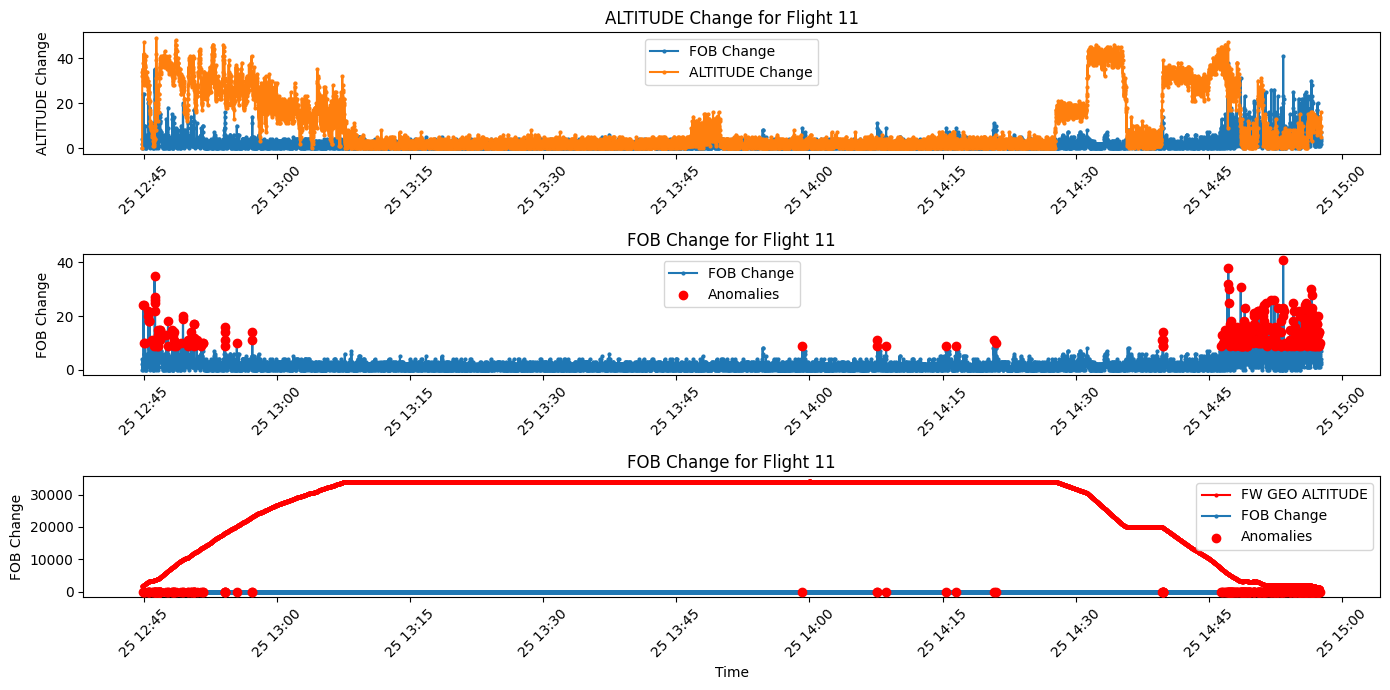

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming msn10_fl8 is your DataFrame
# Step 1: Filter for Flight 11
flight_11_data = msn10_fl8[msn10_fl8['Flight'] == 11]

# Step 2: Visualize FOB Change and Altitude for Flight 11
plt.figure(figsize=(14, 7))

# Plot FOB change
plt.subplot(3, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(flight_11_data['UTC_TIME'], flight_11_data['FOB_change'], label='FOB Change', marker='o', linestyle='-', markersize=2)
plt.title('FOB Change for Flight 11')
plt.xticks(rotation=45)
plt.ylabel('FOB Change')
plt.legend()


# Plot Altitude change
plt.subplot(3, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(flight_11_data['UTC_TIME'], flight_11_data['ALTITUDE_change'], label='ALTITUDE Change', marker='o', linestyle='-', markersize=2)
plt.title('ALTITUDE Change for Flight 11')
plt.xticks(rotation=45)
plt.ylabel('ALTITUDE Change')
plt.legend()

# FOB Change with ANOMALIES
plt.subplot(3, 1, 2)
plt.plot(flight_11_data['UTC_TIME'], flight_11_data['FOB_change'], label='FOB Change', marker='o', linestyle='-', markersize=2)
plt.scatter(significant_changes ['UTC_TIME'], significant_changes ['FOB_change'], color='red', label='Anomalies', zorder=5)  # Highlight anomalies
plt.title('FOB Change for Flight 11')
plt.xticks(rotation=45)
plt.ylabel('FOB Change')
plt.legend()

# Plot Altitude
plt.subplot(3, 1, 3)  # 2 rows, 1 column, 2nd subplot
plt.plot(flight_11_data['UTC_TIME'], flight_11_data['FW_GEO_ALTITUDE'], label='FW GEO ALTITUDE', color='red', marker='o', linestyle='-', markersize=2)
plt.title('FW GEO ALTITUDE for Flight 11')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Altitude')
plt.legend()

# FOB Change with ANOMALIES
plt.plot(flight_11_data['UTC_TIME'], flight_11_data['FOB_change'], label='FOB Change', marker='o', linestyle='-', markersize=2)
plt.scatter(significant_changes ['UTC_TIME'], significant_changes ['FOB_change'], color='red', label='Anomalies', zorder=5)  # Highlight anomalies
plt.title('FOB Change for Flight 11')
plt.xticks(rotation=45)
plt.ylabel('FOB Change')
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
df = msn10_fl8.copy()
df.dtypes

UTC_TIME               object
FUEL_USED_2           float64
FUEL_USED_3           float64
FUEL_USED_4           float64
FW_GEO_ALTITUDE       float64
VALUE_FOB             float64
VALUE_FUEL_QTY_CT     float64
VALUE_FUEL_QTY_FT1    float64
VALUE_FUEL_QTY_FT2    float64
VALUE_FUEL_QTY_FT3    float64
VALUE_FUEL_QTY_FT4    float64
VALUE_FUEL_QTY_LXT    float64
VALUE_FUEL_QTY_RXT    float64
FLIGHT_PHASE_COUNT    float64
FUEL_USED_1           float64
Flight                float64
MSN                    object
FOB_change            float64
ALTITUDE_change       float64
dtype: object

In [58]:
df.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,FOB_change,ALTITUDE_change
2096,2014-07-25 12:44:49,NaN,NaN,NaN,1631.0,29270.0,12.0,1799.0,2533.0,2459.0,1825.0,10294.0,10349.0,8.0,NaN,11.0,F-RBAC,0.0,0.0
2097,2014-07-25 12:44:50,NaN,NaN,NaN,1663.0,29268.0,12.0,1797.0,2529.0,2465.0,1828.0,10293.0,10345.0,8.0,NaN,11.0,F-RBAC,2.0,32.0
2098,2014-07-25 12:44:51,NaN,NaN,NaN,1697.0,29272.0,11.0,1796.0,2530.0,2464.0,1835.0,10289.0,10348.0,8.0,NaN,11.0,F-RBAC,4.0,34.0
2099,2014-07-25 12:44:52,NaN,NaN,NaN,1732.0,29268.0,10.0,1793.0,2525.0,2468.0,1840.0,10282.0,10351.0,8.0,NaN,11.0,F-RBAC,4.0,35.0
2100,2014-07-25 12:44:53,NaN,NaN,NaN,1767.0,29272.0,10.0,1792.0,2519.0,2472.0,1846.0,10271.0,10363.0,8.0,NaN,11.0,F-RBAC,4.0,35.0
